# **Final Project - Short Dark Triad Test (SDT3)**

> Authors: Juan Carlos Arganaraz, Sara Kartalovic, Albut Sercan, Fulvio Zamengo <br>
> Date: 16/12/21 <br>
> Course : Cognitive, Behavioral and Social Data <br>
> Teacher : Giuseppe Sartori <br>
> Co-Teachers : Giulia Melis, Piero Romare

# **1. Abstract**

**Personality tests** may be useful in many fields in order to get a qualitative idea of a person behaviour. The main problem with such tests is that they are self-explanatory and therefore are likely to be falsified for personal benefit. In this work we have analyzed the results of subjects taking the Short Dark Triad 3 test that explore three main personal traits: machiavellism, narcissism and psychopathy.<br>
The main goal has been to investigate the implementation of **machine learning models** with the aim to solve two main issues that, at the best of our knowledge, are still open problems: **spotting faking** presence in personality test responses without validity scales embedded and **restoring the truthful answears** starting from the faked ones.<br>
The results have shown that subjects participating this experiment haven't got great willingness to fake. This general 'soft faking' tendency has huge impact on the final model outcomes making it highly more challenging to fulfill our purposes. On the other hand, in this way, the analysis carried out in this work has gained more interest because the simulated situation is closer to reality where the faking amount is more conservative to assure that it won't be detected.<br>
Even in this hard settings, the proposed methods have obtained **encouraging results** reaching an accuracy level of 75-80% in spotting fakers and outperforming the baseline model that tries to restore the real responses scaling the values on the bases of the average faking amount.

# **2. Introduction**

The **Dark Triad** is a personality test that explores the socially undesirable traits of machiavellianism (manipulative attitude), narcissism (excessive self-love), and psychopathy (lack of empathy).
Studies have shown that people who score high on the Dark Triad are more likely to commit crimes or get in trouble with the law. On the other hand, studies have also shown that Dark Triad individuals are often perceived as possessing leadership qualities and that they achive high social status.

In the present work, we evaluate **two datasets** with the answers of participants that took the Short Dark Triad 3 test (SD3, Jones and Paulhus, 2014). The test investigate the three domains (Machiavellism, Narcissism, Psychopathy) with a total of **27 items (questions)**, 9 for each domain.
The experiment was designed as follows: each voluntary participant underwent the SD3 **test two times**, one trying to give the most **honest** answers and the other one trying to **fake** the results in a reasonable way in order to hide negative personality behaviours and give the best credible self-image.
To set a general deceptive scope the faking was designed simulating two different scenarios:

* Study 1: participants of **JI group** were told that they were going through a job interview (JI) that they cared a lot for and should represent themselves in a good way.
* Study 2: participants of **CC group** received the instructions of completing a personality questionnaire imaging to be a parent that was undergoing a cause for the custody of his/her children (CC), and therefore, they had to show to be the best parent.

For each participant, the answer in good faith was classified such as "H" (honest) and the tentative to avoid showing undesirable personality traits was classified as "D" (dishonest).

The **goals** of this project are the following:

1. Identify which item’s response underwent faking.
2. Reconstruct the honest response given the faked response.

Note: the scores of the dishonest answers are expected to be lower than honest ones because participants are trying to represent themself better than how they really are (Faking Good).

# **3. Dataset description**

*   📌 Test **answers** are always **self-describing** and may be biased.
*   📌 The **CC** and **JJ** groups have **241** and **432 participants** respectively.
*   📌 Each participant **answer** the questionnaire **twice**, one time **honestly** and one time **faking**.
*   📌 A categorical feature classify the test as Honest (**H**) or Dishonest (**D**), there aren't Pathological cases.
*   📌 There are **27 questions** in the test.
*   📌 The response format was 1 (strongly disagree) to 5 (strongly agree) representing a **5 point Likert scale**.

> 
The **short Dark Triad questionnaire (SD3)** package was used to asses the MNP traits:

**Machiavellianism (M)**<br>
Key aspects of machiavellianism: cynical worldview, lack of morality and manipulativeness.
*   **M1** It's not wise to tell your secrets. (Reputation)
*   **M2** I like to use clever manipulation to get my way. (Planning)
*   **M3** Whatever it takes, you must get the important people on your side. (Coalition Building)
*   **M4** Avoid direct conflict with others because they may be useful in the future. (Coalition Building)
*   **M5** It's wise to keep track of information that you can use against people later. (Planning)
*   **M6** You should wait for the right time to get back at people. (Planning)
*   **M7** There are things you should hide from other people because they don't need to know. (Reputation)
*   **M8** Make sure your plans benefit you, not others. (Planning)
*   **M9** Most people can be manipulated.(Cynicism)

**Psychopathy(P)**<br>
Key aspects of psychopathy: deficits in affect (i.e., callousness) and deficits in self-control (i.e., erratic lifestyle).
*   **P1** I like to get revenge on authorities. (Antisocial Behavior)
*   **P2** I avoid dangerous situations. (R) (Erratic Lifestyle)
*   **P3** Payback needs to be quick and nasty. (Callous Affect)
*   **P4** People often say I’m out of control. (Erratic Lifestyle)
*   **P5** It’s true that I can be mean to others. (Short-Term Manipulation)
*   **P6** People who mess with me always regret it. (Antisocial Behavior)
*   **P7** I have never gotten into trouble with the law. (R) (Antisocial Behavior)
*   **P8** I enjoy having sex with people I hardly know. (Short-Term Manipulation)
*   **P9** I’ll say anything to get what I want. (Short-Term Manipulation)

**Narcissism (N)**<br>
Key aspects of of narcissism: manipulation and callousness; defined by a clash between a grandiose identity and underlying insecurity and self-control (i.e., impulsivity)
*   **N1** People see me as a natural leader. (Leadership)
*   **N2** I hate being the center of attention. (R) (Exhibitionism)
*   **N3** Many group activities tend to be dull without me. (Grandiosity)
*   **N4** I know that I am special because everyone keeps telling me so. (Grandiosity)
*   **N5** I like to get acquainted with important people. (Entitlement)
*   **N6** I feel embarrassed if someone compliments me. (R) (Exhibitionism)
*   **N7** I have been compared to famous people. (Grandiosity)
*   **N8** I am an average person. (R) (Grandiosity)
*   **N9** I insist on getting the respect I deserve. (Entitlement)

**Note**: 
1. Each group of items retain the conceptual facet of each trait.<br>
Facets are referenced at the end of each item description between parenthesis.
2. The questions marked with 'R' are designed to go in the reversed direction that means that higher scores should be given to fake good.<br>
On these questions the data collected have already been rescaled, replacing the values 1,..,5 with 5,..,1, in order to have a unique positive direction.


### **Preprocessing raw data**

---



In [ ]:
#@title **Loading dependencies**

# suppress output
%%capture

!pip install catboost
!pip install shap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.inspection import permutation_importance

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
import shap

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import tensorflow.keras as K

In [ ]:
#@title **Definition of some helper functions**
##-------------------
def plot_HD_means(X_h, X_d, X_diff, set):
    no_participants = str(X_diff.shape[0])
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,12))
    X_h.plot(label='Honest', linestyle='dashed', marker='o', ax=ax1)
    X_d.plot(label='Dishonest', linestyle='dashed', marker='o', ax=ax1)
    ax1.set_title('Average Profile of the ' + no_participants + ' Participants on ' + set + ' dataset', fontsize=14)
    ax1.set_xlabel('Items', fontsize=12)
    ax1.set_ylabel('Likert Scale', fontsize=12)
    ax1.legend()
    ax1.set_xticks(np.arange(len(X_h.index)))
    ax1.set_xticklabels(X_h.index)
    
    n_increased = (X_diff < 0).sum(axis=0) # H < D
    n_unchanged = (X_diff == 0).sum(axis=0) # H = D
    n_decreased = (X_diff > 0).sum(axis=0) # H > D
    ax2.barh([i for i in range(27)], n_increased, label='Increased', color="orange")
    ax2.barh([i for i in range(27)], n_unchanged, left=n_increased, label='Unchanged', color="tab:blue")
    ax2.barh([i for i in range(27)], n_decreased, left=n_increased+n_unchanged, label='Decreased', color="tab:orange")
    ax2.set_title('Changing behaviour when faking', fontsize=14)
    ax2.set_ylabel('Items', fontsize=12)
    ax2.set_yticks(np.arange(len(X_h.index)))
    ax2.set_yticklabels(X_h.index)
    ax2.invert_yaxis()  # labels read top-to-bottom
    ax2.set_xlabel('no. participants', fontsize=12)

    tot = n_increased.sum()+n_decreased.sum()+n_unchanged.sum()
    plt.text(0, 35, f"""Overall behaviour (rounding):  increased ~ {round(n_increased.sum()/tot*100)}%,  unchanged ~ {round(n_unchanged.sum()/tot*100)}%,  decreased ~ {round(n_decreased.sum()/tot*100)}%""", fontsize=12)
    ax2.legend()

    return plt.show()
##-------------------
def plot_items_dist(data, set):
  sns.reset_orig()
  p_hist={'cut':0, 'bw_adjust':3} 
  numeric_columns = data._get_numeric_data().columns.values.tolist()
  df2 = pd.melt(data, id_vars = 'Condition', value_vars = numeric_columns, value_name = 'value')
  g = sns.FacetGrid(df2, col = "variable", hue = "Condition",  height = 2, margin_titles = True,
                    col_wrap = 9, aspect = .75, hue_order = ['D','H'], sharex=(True), sharey = True)
  g.map(sns.histplot, 'value', discrete=True, bins = 5, kde = True, ec = 'k', kde_kws = p_hist).add_legend()
  g.set(xticks = np.arange(1,6), xlim = (0, 6), ylim = (0, 400))
  g.set_titles("{col_name}")  # use this argument literally
  g.set_axis_labels(x_var="Liker Scale", y_var="Frequency")
  g.fig.subplots_adjust(top=0.9)
  g.fig.suptitle('Item distribution by group (H/D) on '+set+' dataset', fontdict = {'fontsize':18, 'fontweight':'bold'})
  return plt.show(g)
##-------------------
def plot_CM(X_h, X_d, set):
  corr_h = X_h.corr()
  corr_d = X_d.corr()
  titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]   
  # plot the heatmap
  fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(16,6))
  titles_options = [('Dishonest', corr_d),
                    ('Honest', corr_h)]    
  idx = 0
  for title, db in titles_options:
      sns.heatmap(db, cmap = "Blues", xticklabels = db.columns,
                  yticklabels = db.columns, ax = axes[idx])
      axes[idx].set_title(title)
      idx += 1
  fig.suptitle('Correlation Matrix of '+set+' dataset')
  return plt.show()
##-------------------
def plot_CM_HD(df_h, df_d, set):
  corr_hd = df_d.iloc[:,:-1].reset_index(drop=True).apply(lambda h: df_h.iloc[:,:-1].corrwith(h))
  fig, axes = plt.subplots(figsize=(18,14))
  sns.heatmap(corr_hd, cmap = "Blues", xticklabels = corr_hd.columns,
              linewidth=1, linecolor='w', square=True,
              yticklabels = corr_hd.columns, ax = axes, annot=True, fmt='.2f')
  plt.xlabel('Dishonest', fontsize=14)
  plt.ylabel('Honest', fontsize=14)  
  plt.title('Correlation Matrix Honest vs Dishonest of '+set+' dataset', fontsize=18)
  return plt.show()
##-------------------
def compute_tf_idf(data_h, data_full):

    col_names = list(data_h.columns)
    data_tf_idf = pd.DataFrame()    

    for col in range(len(col_names)):
        data_tf_idf[col_names[col]] = data_full.apply(lambda x: (x==x[col]).sum(), axis=1) #tf

        val_distrib = data_h[col_names[col]].value_counts() #true freq for each value (1...5)
        for i in range(1,6): #set eventually unused vals freq to 1
            if i not in val_distrib:
                val_distrib[i] = 1
        idf_vals = np.log10(data_h.shape[0] * np.ones(5)/val_distrib) #idf for each value (1...5)
        idf = data_full[col_names[col]].copy()
        idf.replace([1,2,3,4,5], [idf_vals[1],idf_vals[2],idf_vals[3],idf_vals[4],idf_vals[5]], inplace=True)

        data_tf_idf[col_names[col]] *= idf 

    #data_tf_idf['mean'] = data_tf_idf.mean(axis=1) #avg tf-idf for each participant
    return data_tf_idf
##-------------------
def create_dataset_clf(set, split_size, scale):
  # USE 'Y' -> StandardScale, o.w. 'N' -> TF-IDF
  X = set.iloc[:,0:27]
  y = set['Condition']
  y = y.replace(['H', 'D'], [1, 0]) 
  y = y.to_numpy()

  if scale == 'Y':
      scaler = StandardScaler()
      scaler.fit(X)
      X = scaler.transform(X)
  else:
      X = compute_tf_idf(set.groupby(['Condition']).get_group('H').iloc[:,:-1], set.iloc[:,:-1])
      # print(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split_size,
                                                      random_state = 123)
  return X_train, X_test, y_train, y_test
##-------------------
def create_dataset_reg(set, split_size, scale):
    
    X = set.groupby(['Condition']).get_group('D').iloc[:,:-1] # Dishonest responses vector
    y = set.groupby(['Condition']).get_group('H').iloc[:,:-1] # Honest responses vector
    
    if scale == 'Y':
        scaler = StandardScaler()
        scaler.fit(X)
        X = scaler.transform(X)
    else:
        X = compute_tf_idf(y, set.iloc[:,:-1])
        X = X.iloc[int(len(X)/2):,:].to_numpy()
        y = y.to_numpy()
            
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split_size,
                                                        random_state = 123)
    return X_train, X_test, y_train, y_test
##-------------------

**Loading data**

In [ ]:
# import data from OWN drive folder
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/CBSD_FP_DATA/DT_df_JI.csv', sep=';', index_col=None, header=0)
data2 = pd.read_csv('/content/drive/MyDrive/CBSD_FP_DATA/DT_df_CC.csv', sep=',', index_col=None, header=0)

Mounted at /content/drive


In [ ]:
# adding labels to dataframe
item_M = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
item_N = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9']
item_P = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9']
datasets = [data, data2]
for set in datasets:
    set.columns = set.columns[:0].tolist() + (item_M + item_P + item_N + ['Condition'])

Now, we can **split** the datasets into a **training** set and a **test** set. Due to the small size of these datasets, we use **cross-validation** technique on the train set to tune hyperparameters and then we check the results on test sets.<br>
The data is going to be **scaled** following two criterias:
1. Standard scale : it subtracts the mean value (standarized values have a zero mean) and then it divides by the standard deviation so the resulting distribution has unit variance.

$$
Z = \frac{X - \mu}{\sigma}
$$

2. TF-IDF (aka Term Frequency-Inverse Document Frequency): this is a standard term-weighting method used to compute a numeric representation of textual data based on the occurring frequency of the terms. The formal expression is the following:

$$
TF-IDF(t, d, C) = TF(d,t) * IDF(t,C)\\
$$

TF(d,t) indicates the frequency of the term t in a document d and IDF(t,C) is equal to $log(N / n)$ where $N$ indicates the number of documents in $C$ and n is the number of documents where $t$ is used. The IDF function must be calculated on the Honest (without fakers) data distribution to get the fair true inverse frequency values.

In [ ]:
[X_train, X_test, y_train, y_test] = create_dataset_clf(data, .8, 'Y')
print('Check train targets balance on JI dataset')
print(f"Class 0: {np.sum(y_train == 0)}")
print(f"Class 1: {np.sum(y_train == 1)}")
print('y_test balance')
print(f"Class 0: {np.sum(y_test == 0)}")
print(f"Class 1: {np.sum(y_test == 1)}")

Check train targets balance on JI dataset
Class 0: 352
Class 1: 339
y_test balance
Class 0: 80
Class 1: 93


In [ ]:
[X_train2, X_test2, y_train2, y_test2] = create_dataset_clf(data2, .8, 'Y')
print('Check train targets balance on CC dataset')
print(f"Class 0: {np.sum(y_train2 == 0)}")
print(f"Class 1: {np.sum(y_train2 == 1)}")
print('y_test balance')
print(f"Class 0: {np.sum(y_test2 == 0)}")
print(f"Class 1: {np.sum(y_test2 == 1)}")

Check train targets balance on CC dataset
Class 0: 194
Class 1: 191
y_test balance
Class 0: 47
Class 1: 50


TF IDF with IDF calculated on Honest (as the contrast is between Honest and Faked, there aren't pathological cases)

In [ ]:
[X_trainf, X_testf, y_trainf, y_testf] = create_dataset_clf(data, .8, 'N')
[X_trainf2, X_testf2, y_trainf2, y_testf2] = create_dataset_clf(data2, .8, 'N')

We apply a similar procedure to prepare the datasets  for regressors algorithms 

In [ ]:
[X_trainr, X_testr, y_trainr, y_testr] = create_dataset_reg(data, 0.8, 'Y')
print('Train/Test data shapes of JI dataset')
print('X_train / y_train shape:', X_trainr.shape, y_trainr.shape)
print('X_test / y_test shape:', X_testr.shape, y_testr.shape)

Train/Test data shapes of JI dataset
X_train / y_train shape: (345, 27) (345, 27)
X_test / y_test shape: (87, 27) (87, 27)


In [ ]:
[X_trainr2, X_testr2, y_trainr2, y_testr2] = create_dataset_reg(data2, 0.8, 'Y')
print('Train/Test data shapes of CC dataset')
print('X_train / y_train shape:', X_trainr2.shape, y_trainr2.shape)
print('X_test / y_test shape:', X_testr2.shape, y_testr2.shape)

Train/Test data shapes of CC dataset
X_train / y_train shape: (192, 27) (192, 27)
X_test / y_test shape: (49, 27) (49, 27)


### **Exploratory Data Analysis (EDA)**
---



We have started our work with a deep inspection of the two datasets (see EDA and PCA subsections).<br>
From this **preliminary analysis** we have found that the subjects of the CC group, even if softly, have adopted the assumed deception strategy (faking good) while the participants of the JI study didn't altered the answears as expected.<br>
This phenomenon can be observed from the many produced charts.

The following six tables display in tabular format some **basic stats** calculated, at single question level for both JI and CC collected replies, on the Honest and Dishonest subsets and their difference. The subsequent plots are probably more easily understandable but from these tables, data of particular interest can be more deeply checked if needed.

In [ ]:
#@title **JI - Honest subset**
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
ji_honest = data.groupby(['Condition']).get_group('H')
ji_honest.describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,P1,P2,P3,P4,P5,P6,P7,P8,P9,N1,N2,N3,N4,N5,N6,N7,N8,N9
count,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00
mean,3.91,2.08,2.19,3.00,2.56,3.55,3.91,2.38,3.10,2.27,2.17,1.92,1.65,2.85,2.28,1.43,1.73,1.74,2.78,2.74,2.12,2.35,2.77,2.71,2.25,2.87,3.42
std,0.81,1.00,0.95,1.10,1.13,0.94,0.76,1.01,1.15,1.07,0.99,0.82,0.81,1.17,0.87,0.83,1.02,0.90,1.07,1.02,0.81,0.89,1.05,1.06,1.05,1.02,0.95
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,4.00,1.00,2.00,2.00,2.00,3.00,4.00,2.00,2.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,3.00
50%,4.00,2.00,2.00,3.00,2.00,4.00,4.00,2.00,3.00,2.00,2.00,2.00,1.00,3.00,2.00,1.00,1.00,2.00,3.00,3.00,2.00,2.00,3.00,3.00,2.00,3.00,4.00
75%,4.00,3.00,3.00,4.00,3.00,4.00,4.00,3.00,4.00,3.00,3.00,2.00,2.00,4.00,3.00,2.00,2.00,2.00,4.00,4.00,2.00,3.00,4.00,4.00,3.00,4.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [ ]:
#@title **JI - Dishonest subset**
ji_dishonest = data.groupby(['Condition']).get_group('D')
ji_dishonest.describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,P1,P2,P3,P4,P5,P6,P7,P8,P9,N1,N2,N3,N4,N5,N6,N7,N8,N9
count,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00
mean,3.82,2.16,2.69,3.17,2.53,3.60,3.64,2.30,2.97,2.14,2.28,1.85,1.52,2.56,2.41,1.22,1.58,1.98,3.30,3.05,2.29,2.60,3.06,3.01,2.67,3.19,3.63
std,0.84,1.08,1.08,1.01,1.06,0.86,0.84,0.98,1.12,1.00,1.01,0.82,0.73,1.13,0.88,0.61,0.81,1.01,1.03,0.96,0.88,0.95,1.07,1.03,1.20,1.08,0.85
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,3.00,1.00,2.00,2.00,2.00,3.00,3.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00
50%,4.00,2.00,3.00,3.00,2.00,4.00,4.00,2.00,3.00,2.00,2.00,2.00,1.00,2.00,2.00,1.00,1.00,2.00,3.00,3.00,2.00,3.00,3.00,3.00,3.00,3.00,4.00
75%,4.00,3.00,3.00,4.00,3.00,4.00,4.00,3.00,4.00,3.00,3.00,2.00,2.00,3.00,3.00,1.00,2.00,2.00,4.00,4.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [ ]:
#@title **JI - Amount of Fake (Honest - Dishonest difference)**
(ji_honest.iloc[:,:-1]-ji_dishonest.reset_index(drop=True).iloc[:,:-1]).describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,P1,P2,P3,P4,P5,P6,P7,P8,P9,N1,N2,N3,N4,N5,N6,N7,N8,N9
count,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00,432.00
mean,0.09,-0.08,-0.50,-0.17,0.03,-0.06,0.27,0.08,0.13,0.13,-0.11,0.07,0.13,0.29,-0.13,0.21,0.16,-0.24,-0.53,-0.31,-0.17,-0.25,-0.29,-0.31,-0.42,-0.32,-0.21
std,0.65,1.07,1.12,0.98,0.98,0.81,0.86,0.94,1.01,0.97,0.94,0.74,0.59,1.08,0.78,0.78,0.84,1.17,0.99,0.93,0.91,0.85,0.93,0.92,1.15,0.99,0.84
min,-3.00,-4.00,-4.00,-3.00,-3.00,-3.00,-2.00,-3.00,-3.00,-2.00,-4.00,-3.00,-4.00,-4.00,-4.00,-4.00,-3.00,-4.00,-4.00,-4.00,-4.00,-3.00,-4.00,-3.00,-4.00,-4.00,-4.00
25%,0.00,-1.00,-1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,2.00,3.00,4.00,4.00,3.00,3.00,4.00,3.00,4.00,4.00,3.00,4.00,3.00,4.00,3.00,4.00,4.00,4.00,2.00,3.00,3.00,2.00,2.00,3.00,4.00,2.00,2.00


In [ ]:
#@title **CC - Honest subset**
cc_honest = data2.groupby(['Condition']).get_group('H')
cc_honest.describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,P1,P2,P3,P4,P5,P6,P7,P8,P9,N1,N2,N3,N4,N5,N6,N7,N8,N9
count,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00
mean,3.93,2.31,2.14,2.99,3.08,3.45,3.80,2.39,3.46,2.87,2.44,2.20,1.83,2.96,2.62,1.67,1.99,1.86,3.00,2.98,2.28,2.58,2.92,2.83,2.46,2.96,3.67
std,0.83,1.06,0.98,1.08,1.10,0.91,0.72,1.00,1.04,1.12,1.02,0.90,0.87,1.12,0.89,1.04,1.09,0.95,0.98,1.02,0.71,0.82,1.09,1.09,1.06,1.06,0.96
min,2.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,3.00,2.00,2.00,2.00,2.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00
50%,4.00,2.00,2.00,3.00,3.00,4.00,4.00,2.00,4.00,3.00,2.00,2.00,2.00,3.00,3.00,1.00,2.00,2.00,3.00,3.00,2.00,2.00,3.00,3.00,2.00,3.00,4.00
75%,4.00,3.00,2.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,3.00,3.00,2.00,4.00,3.00,2.00,3.00,2.00,4.00,4.00,3.00,3.00,4.00,4.00,3.00,4.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [ ]:
#@title **CC - Dishonest subset**
cc_dishonest = data2.groupby(['Condition']).get_group('D')
cc_dishonest.describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,P1,P2,P3,P4,P5,P6,P7,P8,P9,N1,N2,N3,N4,N5,N6,N7,N8,N9
count,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00
mean,3.67,1.74,2.06,2.71,2.34,3.45,3.10,2.05,2.79,1.91,1.69,1.79,1.43,1.88,2.12,1.39,1.40,1.71,2.91,2.62,2.27,2.59,2.88,2.62,2.54,2.59,3.51
std,0.88,1.04,1.12,1.20,1.17,1.12,1.16,1.15,1.31,1.05,0.95,0.85,0.70,0.99,1.00,0.76,0.73,1.14,1.04,1.00,0.89,1.07,1.10,1.04,1.09,0.96,1.00
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,3.00,1.00,1.00,2.00,1.00,3.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00
50%,4.00,1.00,2.00,3.00,2.00,4.00,3.00,2.00,3.00,2.00,1.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,3.00,3.00,2.00,3.00,3.00,3.00,3.00,2.00,4.00
75%,4.00,2.00,3.00,4.00,3.00,4.00,4.00,2.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [ ]:
#@title **CC - Amount of Fake (Honest - Dishonest difference)**
(cc_honest.iloc[:,:-1]-cc_dishonest.reset_index(drop=True).iloc[:,:-1]).describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,P1,P2,P3,P4,P5,P6,P7,P8,P9,N1,N2,N3,N4,N5,N6,N7,N8,N9
count,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00,241.00
mean,0.26,0.57,0.08,0.29,0.74,0.00,0.71,0.34,0.67,0.96,0.76,0.41,0.40,1.08,0.50,0.28,0.59,0.15,0.09,0.35,0.01,-0.02,0.04,0.20,-0.09,0.37,0.17
std,0.96,1.30,1.25,1.32,1.33,1.12,1.33,1.26,1.43,1.19,0.98,1.01,0.97,1.29,1.11,1.00,1.00,1.39,1.08,0.97,0.98,1.08,0.96,1.19,1.21,1.22,1.03
min,-2.00,-4.00,-4.00,-4.00,-4.00,-4.00,-3.00,-4.00,-4.00,-2.00,-2.00,-2.00,-4.00,-2.00,-2.00,-3.00,-1.00,-4.00,-3.00,-3.00,-3.00,-4.00,-3.00,-4.00,-4.00,-4.00,-3.00
25%,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,-1.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,1.00,1.00,1.00,2.00,0.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,2.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00
max,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,3.00,4.00,3.00,4.00,4.00


Here is represented the first analyzed chart. It **compares**, question by question, **answers score distribution** in the honest and dishonest cases.<br>
From these histograms stands out clearly that the responses distributions when faking are widely **overlapping** the truthful ones.<br>
This phenomena is more strongly marked in the JI study where we can also observe that in many cases, especially in the narcissism trait, when slightly faking people seems to move in the unexpected increasing direction.<br>
The faking presence in the CC group is a bit more substantial, even if still quite weak, and is more concentrated in the psychopathy and some questions of the machiavellianism traits. In this case the deceptive strategy is the expected faking good.

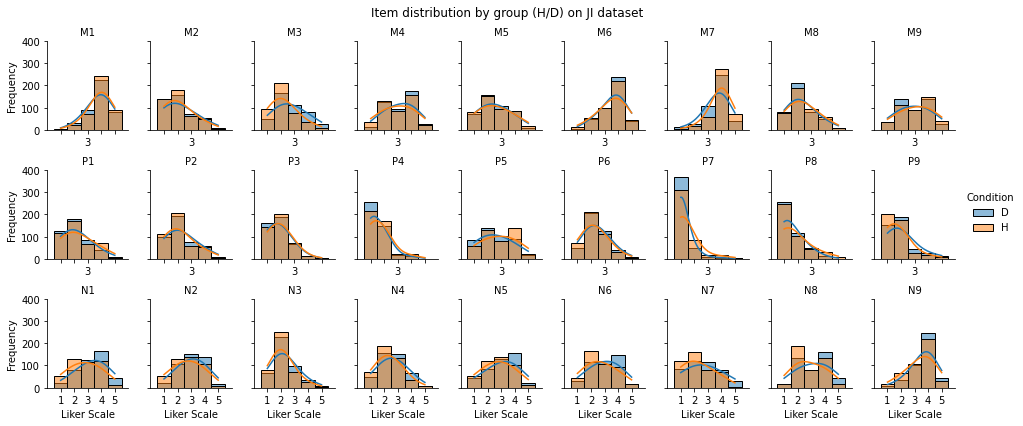

In [ ]:
#@title **JI - Items distribution**
plot_items_dist(data, 'JI')

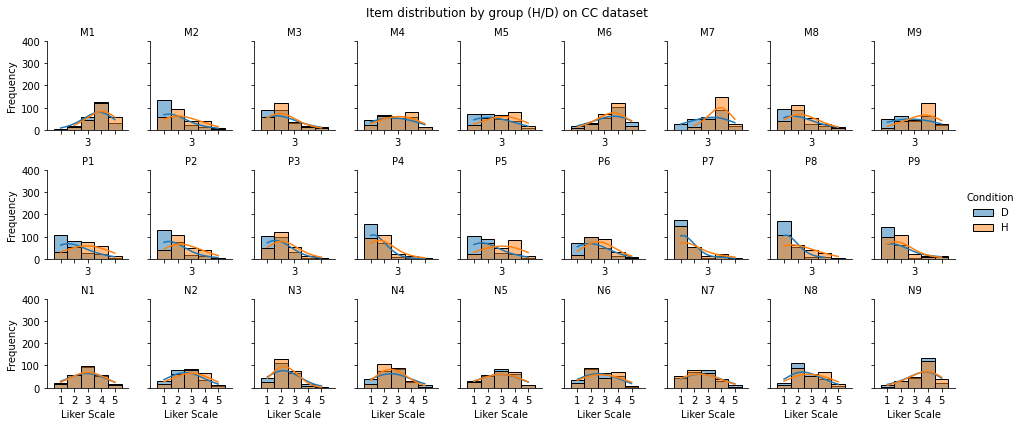

In [ ]:
#@title **CC - Items distribution**
plot_items_dist(data2, 'CC')

The next charts are focusing on the **faking proportion in each question** and the effect that those changes have on the **average responses**.<br>
In both cases we have a confirmation of what was already possible to sense from the previous distributions histograms.<br>
In fact, for the JI study it's possible to observe that as much as 60% of the overall answears is left untouched when faking and more than half of the changed responses are increased so are moved on the opposite direction than the expected one. Moreover this behaviour is shared among all the questions with **no single response critically faked**.<br>
This general tendency is reflected in the average profile comparison where it leaps out that honest and dishonest share the same pattern with just a bunch of values (M3-7, P5, N1-2-5-6-7) that seems to have been somehow significantly altered.<br>
In the CC group the unchainging percentege drops a bit but it's still near 50%, the big difference can be found analyzing the changing behaviour where this time it's visible that the decreasing direction has been chosen more than double the times of the increasing one.<br>
The average profiles again share the same pattern but this time there are more questions and more marked (almost all of the M and P traits, except M3-6 and P9, and somehow also N2-8) where the difference is relevant.


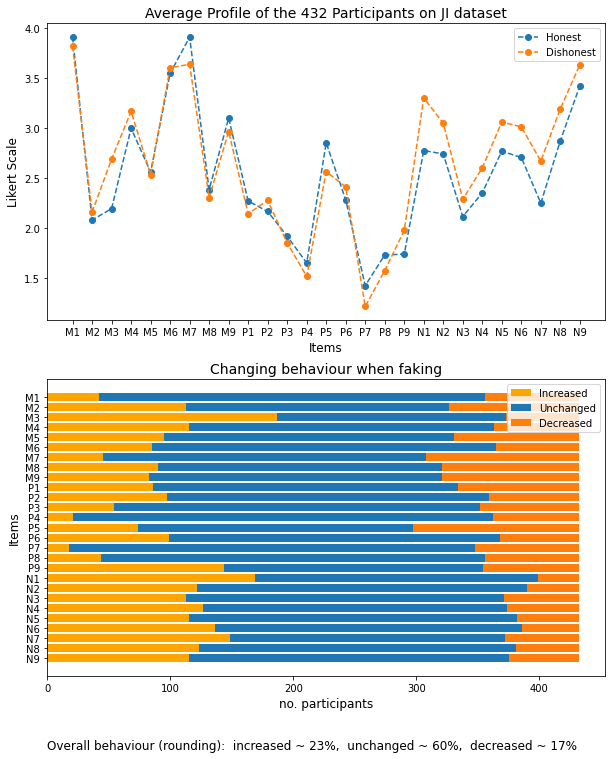

In [ ]:
#@title **JI - Faking behaviour**
X_ji_h = data[data['Condition']=='H'].iloc[:,0:27].mean(axis=0)   
X_ji_d = data[data['Condition']=='D'].iloc[:,0:27].mean(axis=0)
X_ji_diff = data[data['Condition']=='H'].iloc[:,0:27] - data[data['Condition']=='D'].iloc[:,0:27].reset_index(drop=True)
plot_HD_means(X_ji_h, X_ji_d, X_ji_diff, 'JI')

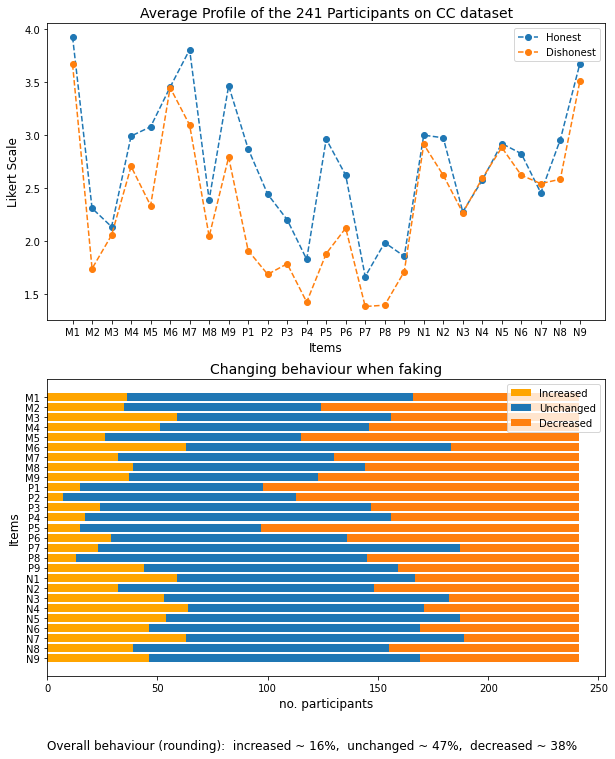

In [ ]:
#@title **CC - Faking behaviour**
X_cc_h = data2[data2['Condition']=='H'].iloc[:,0:27].mean(axis=0)   
X_cc_d = data2[data2['Condition']=='D'].iloc[:,0:27].mean(axis=0)
X_cc_diff = data2[data2['Condition']=='H'].iloc[:,0:27] - data2[data2['Condition']=='D'].iloc[:,0:27].reset_index(drop=True)
plot_HD_means(X_cc_h, X_cc_d, X_cc_diff, 'CC')

We have concluded the EDA with the **correlation matrices**.<br>
First we have compared the **honest** and **dishonest matrices** to check if there is some particular pattern that differ in the two cases.<br>
In the JI study in both cases there seems to be a slight correlation within questions investigating the same trait but nothing relevant.<br>
The same is true for the CC study with an additional very tiny correlation increase in the dishonest case between the machiavellism and the psicopaty trait but nothing much relevant.<br>
After inspecting the correlations within honest and dishonest responses, we checked the correlation **between them**.<br>
In the JI study there is a quite **high correlation between same questions** with the only exception the P9, this is the direct consequence of the fact that the majority of the answears is left unchanged when faking.<br>
In the CC study the most relevant correlations are still found between same questions but only few of them can be considered highly significant, in particular P2, N2 and N5 are in line with the JI levels.

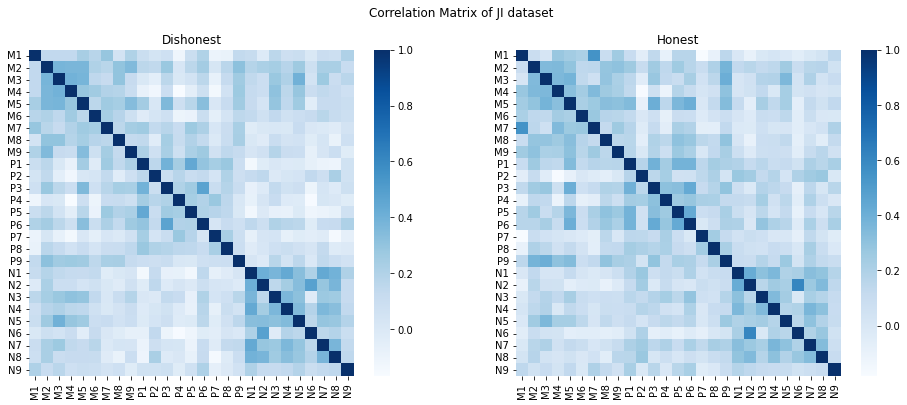

In [ ]:
#@title **JI - Honest and Dishonest correlation matrices**
plot_CM(ji_honest, ji_dishonest, 'JI')

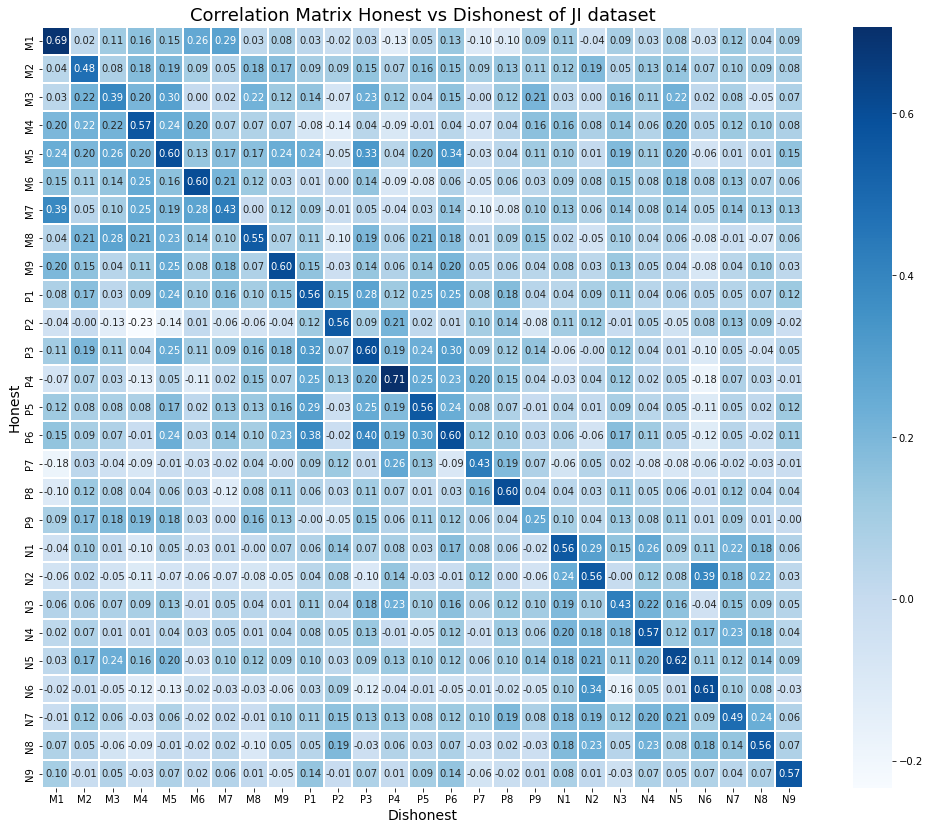

In [ ]:
#@title **JI - Honest vs Dishonest correlation matrix**
plot_CM_HD(ji_honest, ji_dishonest, 'JI')

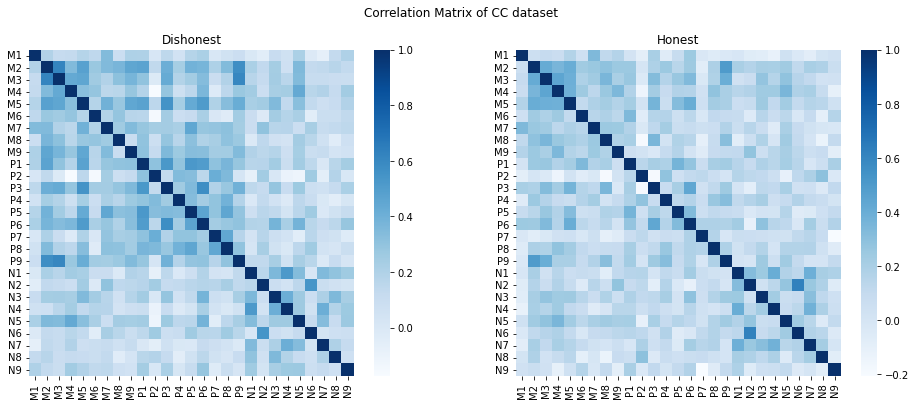

In [ ]:
#@title **CC - Honest and Dishonest correlation matrices**
plot_CM(cc_honest, cc_dishonest, 'CC')

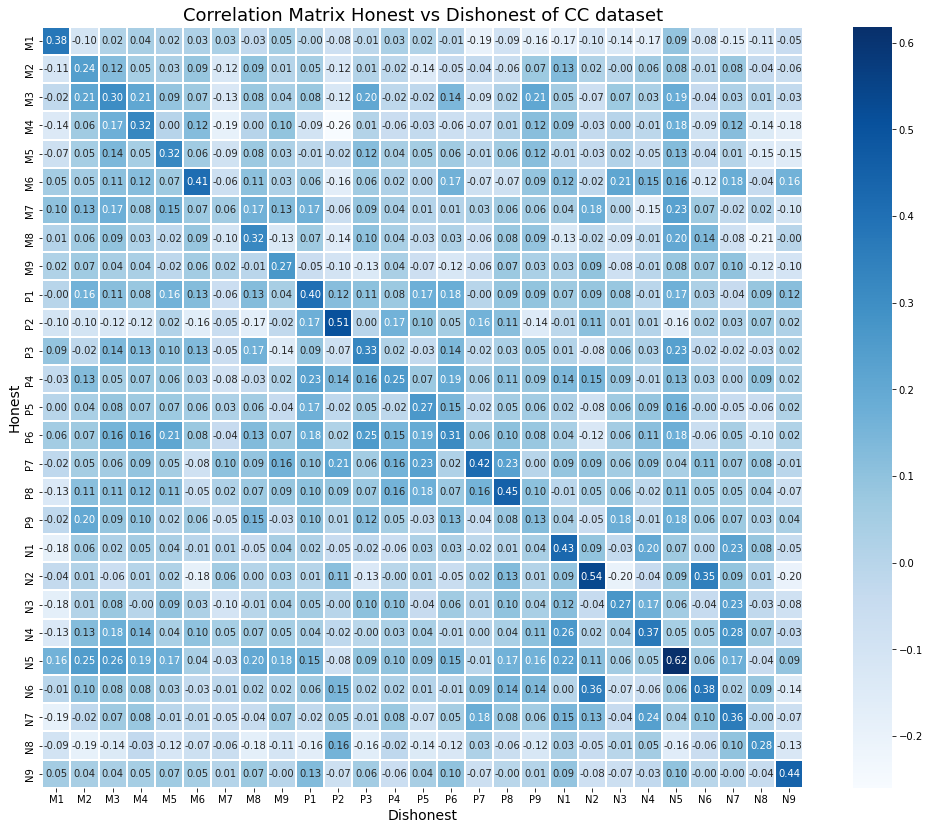

In [ ]:
#@title **CC - Honest vs Dishonest correlation matrix**
plot_CM_HD(cc_honest, cc_dishonest, 'CC')

**Summarizing the EDA results**:
* the **JI case** is quite messy because the participants seems to **not fake that much** and when faking they do it somehow "randomly" going in the unexpected increasing direction even more than the supposed one.<br>
The correlation matrix between honest and dishonest emphasizes a significant **correlation between same questions** and this is due to the unchainging behaviour of the participant of this study.
* in the **CC study** the participants have gone more in the expected direction but also this case is quite tricky, in fact the **answear distributions are nevertheless quite overlapping**.<br>
This time from the correlation matrix between honest and dishonest only a bunch of highly significant correlation are founded and they are again between same questions.<br>
An additional difficulty for the modelling phase of this study will be the fact that the number of tested subjects is almost half the JI group.

### **Principal Component Analysis (PCA)**

---

As **final preliminary inspection** we have gone with PCA and also this kind of analysis highlighted that the honest and dishonest are really close each other as it's clear that the two expected clusters are in reality completely mixed into a single one.

Obtain principal components

In [ ]:
X1 = data.iloc[:,0:27]
X2 = data2.iloc[:,0:27]
pca1 = PCA(.95) #n_components=2
pca2 = PCA(.95) #n_components=2
scaler = StandardScaler()
scaler.fit(X1)
scaler.fit(X2)
X_1 = pca1.fit(X1).transform(X1)
X_2 = pca2.fit(X2).transform(X2)
y1 = data['Condition']
y1 = y1.replace(['H', 'D'], [1, 0]) 
y1 = y1.to_numpy()
y2 = data2['Condition']
y2 = y2.replace(['H', 'D'], [1, 0]) 
y2 = y2.to_numpy()

The original data has 27 columns (3 sets of 9 questions related to each domain). In this section, we project the original data which is in a 27-dimensional space into a 2D space. Notice on the graphs below that the classes are **not well separated** from each other. However, in the case of **CC study** we observed a **more significant separation** between the clusters and this fact supports the idea that a binary classification process might get better accuracy than in the JI study.

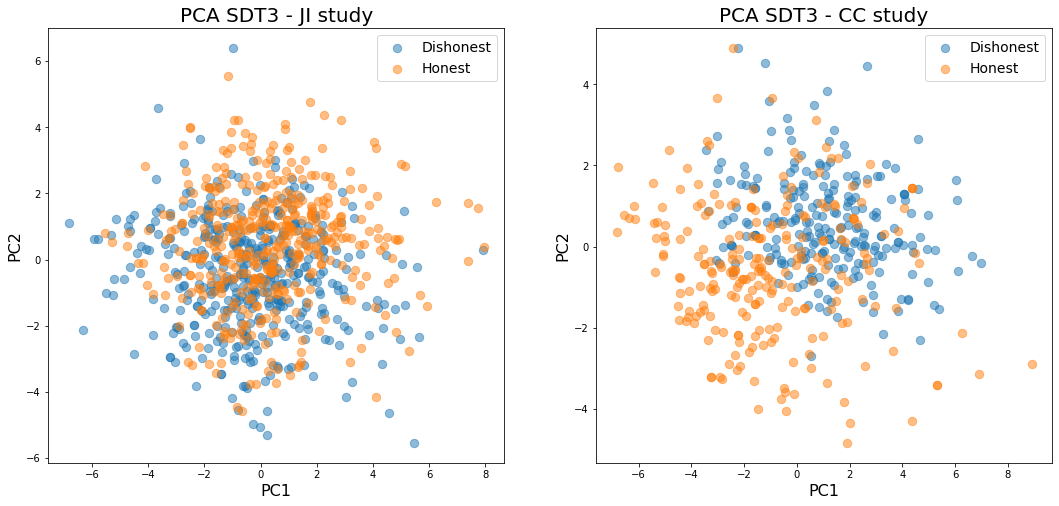

In [ ]:
#@title **PCA plot**
def plot_PCA(X1, y1, X2, y2):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))
       
    ax1.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], label='Dishonest', marker='o',
                s = 70.0, alpha=0.5)
    ax1.scatter(X1[y1 == 0, 0], X1[y1 == 0, 1], label='Honest', marker='o',
                s = 70.0, alpha=0.5)
    ax1.legend(loc = 'upper right', fontsize = 14)
    ax1.set_title('PCA SDT3 - JI study', fontsize = 20)
    ax1.set_xlabel('PC1', size = 16)
    ax1.set_ylabel('PC2', size = 16)

    ax2.scatter(X2[y2 == 1, 0], X2[y2 == 1, 1], label='Dishonest', marker='o',
                s = 70.0, alpha=0.5)
    ax2.scatter(X2[y2 == 0, 0], X2[y2 == 0, 1], label='Honest', marker='o',
                s = 70.0, alpha=0.5)
    ax2.legend(loc = 'upper right', fontsize = 14)
    ax2.set_title('PCA SDT3 - CC study', fontsize = 20)
    ax2.set_xlabel('PC1', size = 16)
    ax2.set_ylabel('PC2', size = 16)    

    return plt.show()

plot_PCA(X_1, y1, X_2, y2)

Determine explained variance using explained_variance_ration_ attribute. We compute the cumulative sum of eigenvalues, It will be used to create step plot for visualizing the variance explained by each principal component.

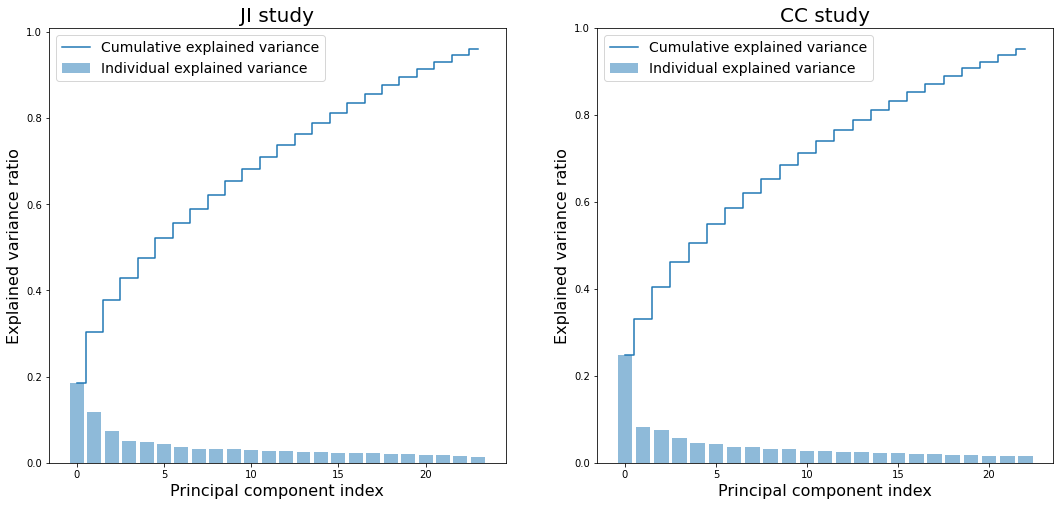

In [ ]:
#@title **Principal components explained variance**
exp_var_pca1 = pca1.explained_variance_ratio_
exp_var_pca1

exp_var_pca2 = pca2.explained_variance_ratio_
exp_var_pca2

cum_sum_eigenvalues1 = np.cumsum(exp_var_pca1)
cum_sum_eigenvalues2 = np.cumsum(exp_var_pca2)

def plot_PCA_variance(exp_var_pca1, cum_sum_eigenvalues1, exp_var_pca2, cum_sum_eigenvalues2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))
    ax1.bar(range(0,len(exp_var_pca1)), exp_var_pca1, alpha = 0.5, align='center',
            label = 'Individual explained variance')
    ax1.step(range(0,len(cum_sum_eigenvalues1)), cum_sum_eigenvalues1, where='mid',
             label = 'Cumulative explained variance')
    ax1.set_title('JI study', fontsize=20)
    ax1.set_ylabel('Explained variance ratio', size = 16)
    ax1.set_xlabel('Principal component index', size = 16)
    ax1.legend(loc='upper left', fontsize=14)

    ax2.bar(range(0,len(exp_var_pca2)), exp_var_pca2, alpha = 0.5, align='center',
            label = 'Individual explained variance')
    ax2.step(range(0,len(cum_sum_eigenvalues2)), cum_sum_eigenvalues2, where='mid',
             label = 'Cumulative explained variance')
    ax2.set_title('CC study', fontsize=20)
    ax2.set_ylabel('Explained variance ratio', size = 16)
    ax2.set_xlabel('Principal component index', size = 16)
    ax2.legend(loc='upper left', fontsize=14)
    return plt.show()

plot_PCA_variance(exp_var_pca1, cum_sum_eigenvalues1, exp_var_pca2, cum_sum_eigenvalues2)

The **explained variance** tells us how much information (variance) can be attributed to each of the principal components. By using the attribute explained_variance_ratio_, we can see that on **JI study**, the first principal component explain **18.56%** of the total variance and the second one an additional **11.90%**. Combined together, the two components cover **30.46%** of the variability. On the other side, on **CC study** the first principal component explain **24.74%** of the variance and the second catch another **8.25%** for a cumulative value of **32.99%**.

# **4. Models**

As it was mentioned in the introduction, our work aims to build **two types of models** which are able to: 
1. **Determine if a participant is faking** his responses that means to classify the test as Faked or Honest (binary classification).
2. **Reconstruct the honest profiles** from the faked ones that means restoring the truthful answers from the faked ones at individual level (multioutput regressors).

A preprocessing TF-IDF rescaling could be applied in order to try to better separate fakers from honest question-wise.

The working procedure that has been followed consist in tuning the hyper-parameters with a **5-fold grid-search cross-validation** on the training set and then to **evaluate** the models on the test data.

## **Classifiers**

--- 

We build and evaluate some binary classifiers based on the following machine learning algorithms:

* K-Nearest Neighbors (k-NN)
* Logistic Regression (LR).
* Support Vector Machines (SVM).
* Random Forest (RF)
* Multilayer perceptron (MLP).

We will evaluate their performance using the following measure:

$$
Acc(y,\hat{y}) = \frac{1}{N} \sum_{j=1}^{N} 1(y_{i}=\hat{y_{i}})
$$

In [ ]:
#@title **Definition of some helper functions to evaluate classifiers**
#---------------------------------------------------------------------------
def prt_model_performance(model, X_test, y_test, set_name):
    estimator_name = model.__class__.__name__
    best_test_score = model.score(X_test, y_test)
    model_parameters = model.get_params()
    model_predict = model.predict(X_test)
    recall = recall_score(y_test, model_predict, average='macro')
    precision = precision_score(y_test, model_predict, average='macro')
    f1 = f1_score(y_test, model_predict, average='macro')  
    print(f'-----------------------------------------------------')
    print(f'Best model    > {model}')
    print(f'Test Accuracy : {best_test_score:.4f}')
    print(f'Precision     : {precision:.4f}')
    print(f'Recall        : {recall:.4f}')
    print(f'F1 Score      : {f1:.4f}')
    print(f'-----------------------------------------------------')
    print(classification_report(y_test, model_predict))
    summary_model = [(set_name, estimator_name, model_parameters, best_test_score)]
    return summary_model
#----------------------------------------------------------------------------
def plt_cmx(classifier, X_test, y_test, chart_title, class_labels=[0, 1]):   
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(12,5))
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    idx = 0
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                     ax = axes[idx],
                                     display_labels = class_labels,
                                     cmap = plt.cm.Blues,
                                     normalize = normalize)
        axes[idx].set_title(title)
        idx += 1
    fig.suptitle(chart_title)
    return plt.show()
#---------------------------------------------------------
cnames=['Study', 'Model', 'Parameters', 'Test Accuracy']
clf_results = pd.DataFrame(columns=cnames)
#---------------------------------------------------------
def update_summary(list, df):
  df.loc[len(df.index)] = list
  df.sort_values(by=['Test Accuracy'], ascending=True)
  return
#----------------------------------------------------------

### **K-Nearest Neighbors (k-NN)**

Is a basic non-parametric algorithm that uses distance measure to classify data based on their similarity.<br>
The main assumption of this model is that similar things are close each other.

**JI - Fine tuning of k Nearest Neighbors model**

In [ ]:
kNN = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid_kf = {'weights': ['uniform', 'distance'],
                  'n_neighbors': k_range,
                  'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                  'metric': ['euclidean', 'manhattan'],
                }

gs_kNN_f = GridSearchCV(kNN, param_grid_kf, cv = 5, return_train_score = True)
gs_kNN_f = gs_kNN_f.fit(X_train, y_train)
kNN_results_f = gs_kNN_f.cv_results_
results_kNN_df = pd.DataFrame({'rank': kNN_results_f['rank_test_score'],
                                'params': kNN_results_f['params'],
                                'cv train score (mean)': kNN_results_f['mean_train_score'],
                                'cv test score (mean)': kNN_results_f['mean_test_score'],
                                'cv score (std)': kNN_results_f['std_test_score']}
                              )
results_kNN_df = results_kNN_df.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_kNN_df.head()

,rank,params,cv train score (mean),cv test score (mean),cv score (std)
226,1,"{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 24, 'weights': 'uniform'}",0.66,0.63,0.03
106,1,"{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 24, 'weights': 'uniform'}",0.66,0.63,0.03
346,1,"{'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 24, 'weights': 'uniform'}",0.66,0.63,0.03
238,4,"{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'uniform'}",0.66,0.63,0.03
118,4,"{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'uniform'}",0.66,0.63,0.03


-----------------------------------------------------
Best model    > KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=24)
Test Accuracy : 0.6474
Precision     : 0.6461
Recall        : 0.6467
F1 Score      : 0.6462
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.64      0.63        80
           1       0.68      0.66      0.67        93

    accuracy                           0.65       173
   macro avg       0.65      0.65      0.65       173
weighted avg       0.65      0.65      0.65       173



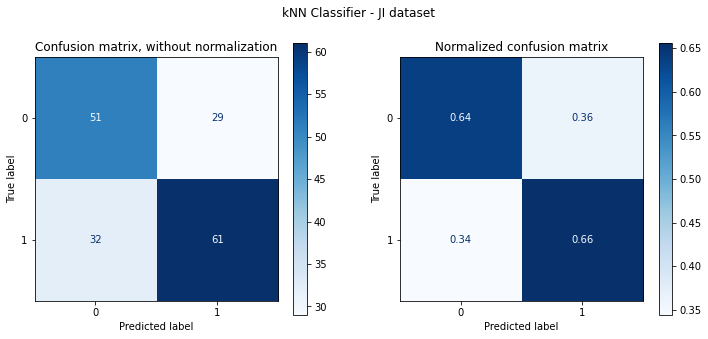

In [ ]:
#@title **JI - Best knn model performance**
kNN_best = gs_kNN_f.best_estimator_
[knn_sum] = prt_model_performance(kNN_best, X_test, y_test, 'JI')
plt_cmx(kNN_best, X_test, y_test, 'kNN Classifier - JI dataset')
update_summary(knn_sum, clf_results)

**CC - Fine tuning of k Nearest Neighbors model**

In [ ]:
gs_kNN2 = GridSearchCV(kNN, param_grid_kf, cv = 5, return_train_score = True)
gs_kNN2 = gs_kNN2.fit(X_train2, y_train2)
kNN_results_cc = gs_kNN2.cv_results_
results_kNN_cc = pd.DataFrame({'rank': kNN_results_cc['rank_test_score'],
                                'params': kNN_results_cc['params'],
                                'cv train score (mean)': kNN_results_cc['mean_train_score'],
                                'cv test score (mean)': kNN_results_cc['mean_test_score'],
                                'cv score (std)': kNN_results_cc['std_test_score']}
                              )
results_kNN_cc = results_kNN_cc.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_kNN_cc.head()

,rank,params,cv train score (mean),cv test score (mean),cv score (std)
353,1,"{'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'distance'}",1.00,0.74,0.05
105,1,"{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}",1.00,0.74,0.04
345,1,"{'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}",1.00,0.74,0.04
233,1,"{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'distance'}",1.00,0.74,0.05
113,1,"{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'distance'}",1.00,0.74,0.05


-----------------------------------------------------
Best model    > KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=23,
                     weights='distance')
Test Accuracy : 0.7216
Precision     : 0.7223
Recall        : 0.7223
F1 Score      : 0.7216
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        47
           1       0.74      0.70      0.72        50

    accuracy                           0.72        97
   macro avg       0.72      0.72      0.72        97
weighted avg       0.72      0.72      0.72        97



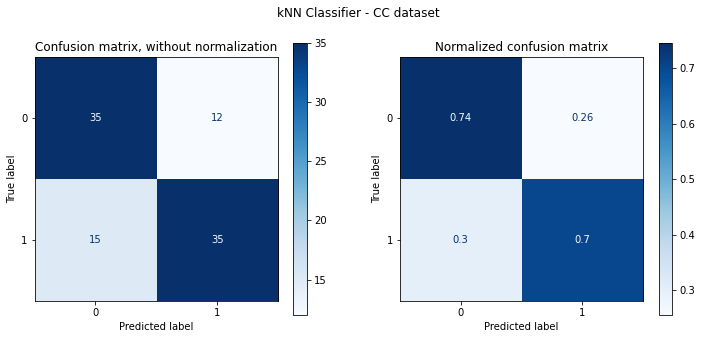

In [ ]:
#@title **CC - Best knn model performance**
kNN_best2 = gs_kNN2.best_estimator_
[knn_sum2] = prt_model_performance(kNN_best2, X_test2, y_test2, 'CC')
plt_cmx(kNN_best2, X_test2, y_test2, 'kNN Classifier - CC dataset')
update_summary(knn_sum2, clf_results)

### **Logistic Regression (LR)**


Logistic regression model measures the relationship between the response and the independent variables by estimating probabilities using the logistic function. An additional penalty term may be used in order to reduce overfitting and to consent generalization of the model on new data.


**JI - Fine tuning of Logistic Regression model**

In [ ]:
LR = LogisticRegression()
C_values_lr = [0.5, 1, 5, 7, 10, 100]
param_grid_lr = {'solver': ['newton-cg', 'lbfgs', 'sag'],
                 'C': C_values_lr,
                 'penalty': ['none', 'l1', 'l2', 'elasticnet']}
gs_LR = GridSearchCV(LR, param_grid_lr, cv = 5, scoring = 'accuracy', return_train_score = True, verbose=0)
gs_LR = gs_LR.fit(X_train, y_train)

LR_results_f = gs_LR.cv_results_
results_LR_df = pd.DataFrame({'rank': LR_results_f['rank_test_score'],
                              'params': LR_results_f['params'],
                              'cv train score (mean)': LR_results_f['mean_train_score'],
                              'cv test score (mean)': LR_results_f['mean_test_score'],
                              'cv score (std)': LR_results_f['std_test_score']}
                             )
results_LR_df = results_LR_df.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_LR_df.head()

,rank,params,cv train score (mean),cv test score (mean),cv score (std)
18,1,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",0.67,0.64,0.05
20,1,"{'C': 1, 'penalty': 'l2', 'solver': 'sag'}",0.67,0.64,0.05
19,1,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.67,0.64,0.05
60,4,"{'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}",0.67,0.64,0.05
50,4,"{'C': 10, 'penalty': 'none', 'solver': 'sag'}",0.67,0.64,0.05


-----------------------------------------------------
Best model    > LogisticRegression(C=1, solver='newton-cg')
Test Accuracy : 0.7283
Precision     : 0.7268
Recall        : 0.7263
F1 Score      : 0.7265
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.70      0.70        80
           1       0.74      0.75      0.75        93

    accuracy                           0.73       173
   macro avg       0.73      0.73      0.73       173
weighted avg       0.73      0.73      0.73       173



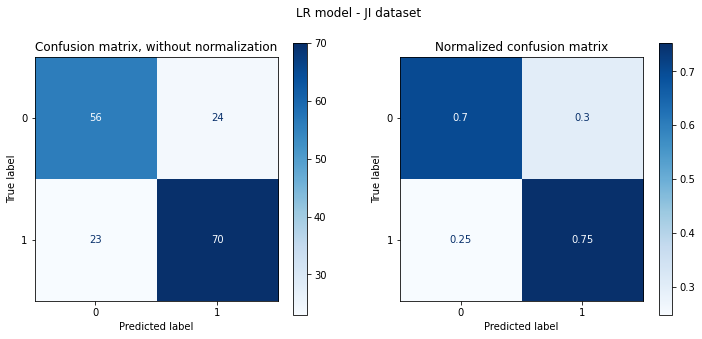

In [ ]:
#@title **JI - Best LR model performance**
LR_best = gs_LR.best_estimator_   ## get the best model
[lr_sum] = prt_model_performance(LR_best, X_test, y_test, 'JI')
plt_cmx(LR_best, X_test, y_test, 'LR model - JI dataset')
update_summary(lr_sum, clf_results)

**CC - Fine tuning of Logistic Regression model**

In [ ]:
gs_LR2 = GridSearchCV(LR, param_grid_lr, cv = 5, scoring = 'accuracy', return_train_score = True, verbose=0)
gs_LR2 = gs_LR2.fit(X_train2, y_train2)

LR_results_cc = gs_LR2.cv_results_
results_LR_cc = pd.DataFrame({'rank': LR_results_cc['rank_test_score'],
                              'params': LR_results_cc['params'],
                              'cv train score (mean)': LR_results_cc['mean_train_score'],
                              'cv test score (mean)': LR_results_cc['mean_test_score'],
                              'cv score (std)': LR_results_cc['std_test_score']}
                             )
results_LR_cc = results_LR_cc.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_LR_cc.head()

,rank,params,cv train score (mean),cv test score (mean),cv score (std)
6,1,"{'C': 0.5, 'penalty': 'l2', 'solver': 'newton-cg'}",0.78,0.75,0.03
7,1,"{'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}",0.78,0.75,0.03
8,1,"{'C': 0.5, 'penalty': 'l2', 'solver': 'sag'}",0.78,0.75,0.03
0,4,"{'C': 0.5, 'penalty': 'none', 'solver': 'newton-cg'}",0.78,0.75,0.04
38,4,"{'C': 7, 'penalty': 'none', 'solver': 'sag'}",0.78,0.75,0.04


-----------------------------------------------------
Best model    > LogisticRegression(C=0.5, solver='newton-cg')
Test Accuracy : 0.7320
Precision     : 0.7354
Recall        : 0.7336
F1 Score      : 0.7317
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        47
           1       0.77      0.68      0.72        50

    accuracy                           0.73        97
   macro avg       0.74      0.73      0.73        97
weighted avg       0.74      0.73      0.73        97



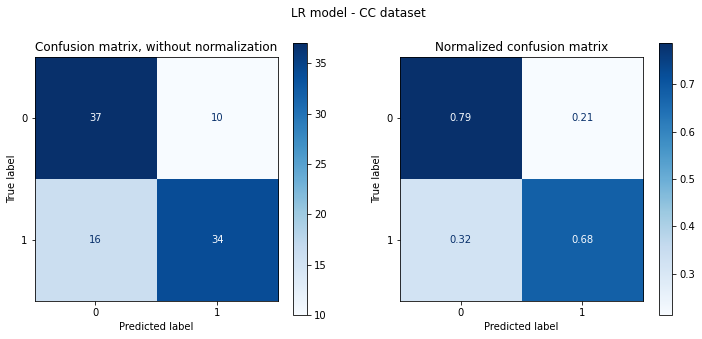

In [ ]:
#@title **CC - Best LR model performance**
LR_best2 = gs_LR2.best_estimator_
[lr2] = prt_model_performance(LR_best2, X_test2, y_test2, 'CC')
plt_cmx(LR_best2, X_test2, y_test2, 'LR model - CC dataset')
update_summary(lr2, clf_results)

### **Support Vector Machine (SVM)**

Support Vector Machine is an algorithm with the basic idea of creating a hyperplane that separate the data into different classes.<br>
SVMs can also efficiently perform non-linear classification thanks to a kernel function.

**JI - Fine tuning of Support Vector Machine model**

In [ ]:
SVC = SVC(kernel='linear', probability=True, random_state = 42)
C_values_svc = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid_svc = {'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': ['auto'],
                  'C': C_values_svc}

gs_SVC = GridSearchCV(SVC, param_grid_svc, cv = 5, return_train_score = True, verbose=1)
gs_SVC = gs_SVC.fit(X_train, y_train)

SVC_results_ji = gs_SVC.cv_results_
results_SVC_ji = pd.DataFrame({'rank': SVC_results_ji['rank_test_score'],
                              'params': SVC_results_ji['params'],
                              'cv train score (mean)': SVC_results_ji['mean_train_score'],
                              'cv test score (mean)': SVC_results_ji['mean_test_score'],
                              'cv score (std)': SVC_results_ji['std_test_score']}
                             )
results_SVC_ji = results_SVC_ji.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_SVC_ji.head()

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,rank,params,cv train score (mean),cv test score (mean),cv score (std)
12,1,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",0.68,0.64,0.04
15,2,"{'C': 100, 'gamma': 'auto', 'kernel': 'linear'}",0.68,0.64,0.04
9,3,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.68,0.63,0.05
6,3,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.68,0.63,0.04
3,5,"{'C': 0.01, 'gamma': 'auto', 'kernel': 'linear'}",0.67,0.63,0.04


-----------------------------------------------------
Best model    > SVC(C=10, gamma='auto', kernel='linear', probability=True, random_state=42)
Test Accuracy : 0.7168
Precision     : 0.7151
Recall        : 0.7147
F1 Score      : 0.7149
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.69      0.69        80
           1       0.73      0.74      0.74        93

    accuracy                           0.72       173
   macro avg       0.72      0.71      0.71       173
weighted avg       0.72      0.72      0.72       173



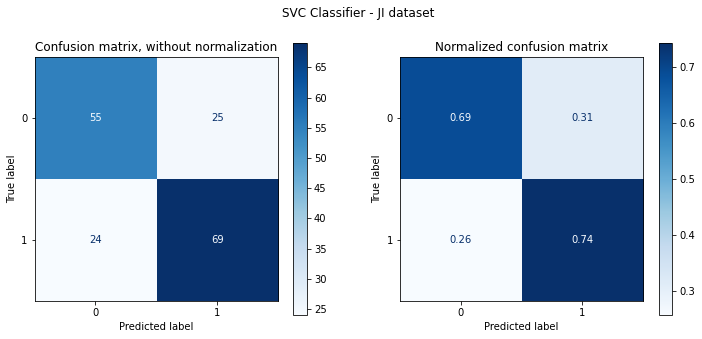

In [ ]:
#@title **JI - Best SVM model performance**
SVC_best = gs_SVC.best_estimator_
[SCV1] = prt_model_performance(SVC_best, X_test, y_test, 'JI')
plt_cmx(SVC_best, X_test, y_test, 'SVC Classifier - JI dataset')
update_summary(SCV1, clf_results)

**CC - Fine tuning of Support Vector Machine model**

In [ ]:
gs_SVC2 = GridSearchCV(SVC, param_grid_svc, cv = 5, return_train_score = True, verbose=1)
gs_SVC2 = gs_SVC2.fit(X_train2, y_train2)

SVC_results_cc = gs_SVC2.cv_results_
results_SVC_cc = pd.DataFrame({'rank': SVC_results_cc['rank_test_score'],
                              'params': SVC_results_cc['params'],
                              'cv train score (mean)': SVC_results_cc['mean_train_score'],
                              'cv test score (mean)': SVC_results_cc['mean_test_score'],
                              'cv score (std)': SVC_results_cc['std_test_score']}
                             )
results_SVC_cc = results_SVC_cc.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_SVC_cc.head()

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,rank,params,cv train score (mean),cv test score (mean),cv score (std)
3,1,"{'C': 0.01, 'gamma': 'auto', 'kernel': 'linear'}",0.78,0.76,0.06
6,2,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.79,0.75,0.07
10,3,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.88,0.75,0.05
9,4,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.80,0.74,0.04
15,5,"{'C': 100, 'gamma': 'auto', 'kernel': 'linear'}",0.80,0.73,0.04


-----------------------------------------------------
Best model    > SVC(C=0.01, gamma='auto', kernel='linear', probability=True, random_state=42)
Test Accuracy : 0.7526
Precision     : 0.7523
Recall        : 0.7523
F1 Score      : 0.7523
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        47
           1       0.76      0.76      0.76        50

    accuracy                           0.75        97
   macro avg       0.75      0.75      0.75        97
weighted avg       0.75      0.75      0.75        97



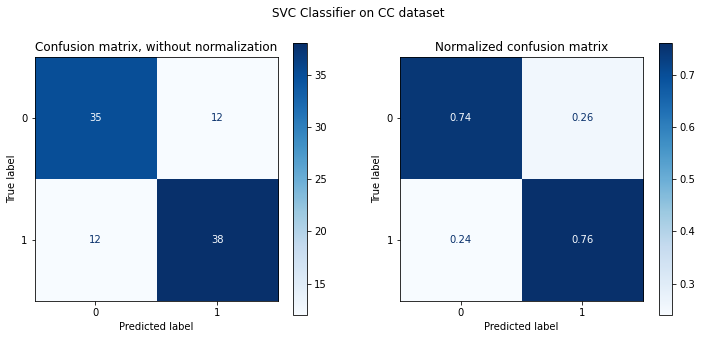

In [ ]:
#@title **CC - Best SVM model performance**
SVC_best2 = gs_SVC2.best_estimator_
[SCV2] = prt_model_performance(SVC_best2, X_test2, y_test2, 'CC')
plt_cmx(SVC_best2, X_test2, y_test2, 'SVC Classifier on CC dataset')
update_summary(SCV2, clf_results)

### **Random Forest (RF)**

Random Forest is an ensamble method that construct a set of classifiers (i.e. decision trees) and than classify by taking a weighted vote of their individual predictions. Ensamble models by combining different classifiers enhance the achived performances.

**JI - Fine tuning of Random Forest model**

In [ ]:
rf = RandomForestClassifier(random_state=123, max_features='sqrt')

param_grid_rf = {
    "n_estimators":[10,20,30,40,50],
    'max_depth': [3,5,7,9],
    'min_samples_split': [5,9,13]
}
gs_rf = GridSearchCV(rf, param_grid_rf, cv = 5, scoring = 'accuracy', return_train_score = True, verbose=0)
gs_rf = gs_rf.fit(X_train, y_train)

rf_results_f = gs_rf.cv_results_
results_rf_df = pd.DataFrame({'rank': rf_results_f['rank_test_score'],
                              'params': rf_results_f['params'],
                              'cv train score (mean)': rf_results_f['mean_train_score'],
                              'cv test score (mean)': rf_results_f['mean_test_score'],
                              'cv score (std)': rf_results_f['std_test_score']}
                             )
results_rf_df = results_rf_df.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_rf_df.head()

,rank,params,cv train score (mean),cv test score (mean),cv score (std)
12,1,"{'max_depth': 3, 'min_samples_split': 13, 'n_estimators': 30}",0.71,0.65,0.03
7,2,"{'max_depth': 3, 'min_samples_split': 9, 'n_estimators': 30}",0.71,0.65,0.03
9,3,"{'max_depth': 3, 'min_samples_split': 9, 'n_estimators': 50}",0.71,0.64,0.03
2,4,"{'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 30}",0.71,0.64,0.04
6,5,"{'max_depth': 3, 'min_samples_split': 9, 'n_estimators': 20}",0.71,0.64,0.05


-----------------------------------------------------
Best model    > RandomForestClassifier(max_depth=3, max_features='sqrt', min_samples_split=13,
                       n_estimators=30, random_state=123)
Test Accuracy : 0.7052
Precision     : 0.7046
Recall        : 0.7057
F1 Score      : 0.7046
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        80
           1       0.74      0.70      0.72        93

    accuracy                           0.71       173
   macro avg       0.70      0.71      0.70       173
weighted avg       0.71      0.71      0.71       173



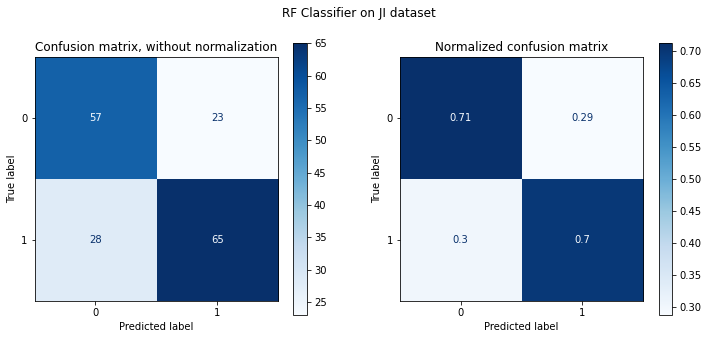

In [ ]:
#@title **JI - Best RF model performance**
rf_best = gs_rf.best_estimator_
[RF1] = prt_model_performance(rf_best, X_test, y_test, 'JI')
plt_cmx(rf_best, X_test, y_test, 'RF Classifier on JI dataset')
update_summary(RF1, clf_results)

**CC - Fine tuning of Random Forest model**

In [ ]:
gs_rf2 = GridSearchCV(rf, param_grid_rf, cv = 5, scoring = 'accuracy', return_train_score = True, verbose=0)
gs_rf2 = gs_rf2.fit(X_train2, y_train2)

rf_results_cc = gs_rf2.cv_results_
results_rf_cc = pd.DataFrame({'rank': rf_results_cc['rank_test_score'],
                              'params': rf_results_cc['params'],
                              'cv train score (mean)': rf_results_cc['mean_train_score'],
                              'cv test score (mean)': rf_results_cc['mean_test_score'],
                              'cv score (std)': rf_results_cc['std_test_score']}
                             )
results_rf_cc = results_rf_cc.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_rf_cc.head()

,rank,params,cv train score (mean),cv test score (mean),cv score (std)
38,1,"{'max_depth': 7, 'min_samples_split': 9, 'n_estimators': 40}",0.90,0.77,0.03
41,1,"{'max_depth': 7, 'min_samples_split': 13, 'n_estimators': 20}",0.88,0.77,0.05
57,3,"{'max_depth': 9, 'min_samples_split': 13, 'n_estimators': 30}",0.91,0.77,0.05
33,3,"{'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 40}",0.93,0.77,0.03
17,3,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 30}",0.87,0.77,0.03


-----------------------------------------------------
Best model    > RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_split=9,
                       n_estimators=40, random_state=123)
Test Accuracy : 0.8144
Precision     : 0.8150
Recall        : 0.8136
F1 Score      : 0.8139
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        47
           1       0.81      0.84      0.82        50

    accuracy                           0.81        97
   macro avg       0.81      0.81      0.81        97
weighted avg       0.81      0.81      0.81        97



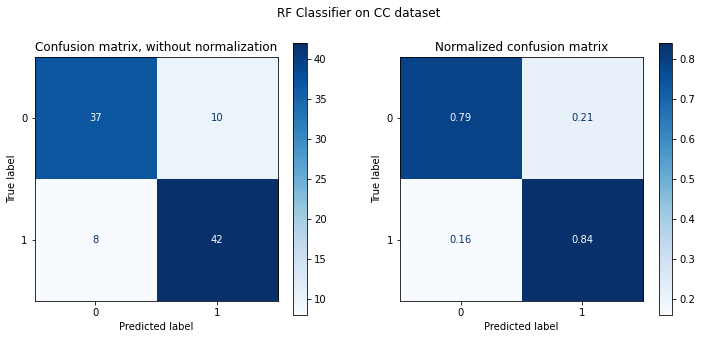

In [ ]:
#@title **CC - Best RF model performance**
rf_best2 = gs_rf2.best_estimator_
[RF2] = prt_model_performance(rf_best2, X_test2, y_test2, 'CC')
plt_cmx(rf_best2, X_test2, y_test2, 'RF Classifier on CC dataset')
update_summary(RF2, clf_results)

**JI - TF-IDF scaled - Fine tuning of Random Forest model**

In [ ]:
rf3 = RandomForestClassifier(random_state=123, max_features='sqrt')

param_grid_rf3 = {
    "n_estimators":[10,20,30,40,50],
    'max_depth': [3,5,7,9],
    'min_samples_split': [5,9,13]
}
gs_rf3 = GridSearchCV(rf3, param_grid_rf, cv = 5, scoring = 'accuracy', return_train_score = True, verbose=0)
gs_rf3 = gs_rf3.fit(X_trainf, y_trainf)

rf_results_f3 = gs_rf3.cv_results_
results_rf3_df = pd.DataFrame({'rank': rf_results_f3['rank_test_score'],
                              'params': rf_results_f3['params'],
                              'cv train score (mean)': rf_results_f3['mean_train_score'],
                              'cv test score (mean)': rf_results_f3['mean_test_score'],
                              'cv score (std)': rf_results_f3['std_test_score']}
                             )
results_rf3_df = results_rf3_df.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_rf3_df.head()

,rank,params,cv train score (mean),cv test score (mean),cv score (std)
2,1,"{'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 30}",0.73,0.62,0.04
7,2,"{'max_depth': 3, 'min_samples_split': 9, 'n_estimators': 30}",0.73,0.61,0.04
32,3,"{'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 30}",0.94,0.60,0.05
18,4,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 40}",0.86,0.60,0.03
12,5,"{'max_depth': 3, 'min_samples_split': 13, 'n_estimators': 30}",0.72,0.60,0.03


-----------------------------------------------------
Best model    > RandomForestClassifier(max_depth=3, max_features='sqrt', min_samples_split=5,
                       n_estimators=30, random_state=123)
Test Accuracy : 0.5896
Precision     : 0.5898
Recall        : 0.5903
F1 Score      : 0.5891
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.60      0.57        80
           1       0.63      0.58      0.60        93

    accuracy                           0.59       173
   macro avg       0.59      0.59      0.59       173
weighted avg       0.59      0.59      0.59       173



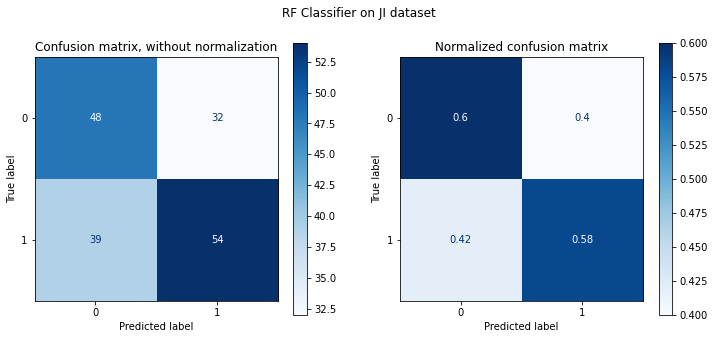

In [ ]:
#@title **JI - TF-IDF scale - Best RF model performance**
rf3_best = gs_rf3.best_estimator_
[RF3] = prt_model_performance(rf3_best, X_testf, y_testf, 'JI')
plt_cmx(rf3_best, X_testf, y_testf, 'RF Classifier on JI dataset')

**CC - TF-IDF scaled - Fine tuning of Random Forest model**

In [ ]:
rf4 = RandomForestClassifier(random_state=123, max_features='sqrt')
param_grid_rf4 = {
    "n_estimators":[10,20,30,40,50],
    'max_depth': [3,5,7,9],
    'min_samples_split': [5,9,13]
}
gs_rf4 = GridSearchCV(rf4, param_grid_rf, cv = 5, scoring = 'accuracy', return_train_score = True, verbose=0)
gs_rf4 = gs_rf4.fit(X_trainf2, y_trainf2)

rf_results_f4 = gs_rf4.cv_results_
results_rf4_df = pd.DataFrame({'rank': rf_results_f4['rank_test_score'],
                              'params': rf_results_f4['params'],
                              'cv train score (mean)': rf_results_f4['mean_train_score'],
                              'cv test score (mean)': rf_results_f4['mean_test_score'],
                              'cv score (std)': rf_results_f4['std_test_score']}
                             )
results_rf4_df = results_rf4_df.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_rf4_df.head()

,rank,params,cv train score (mean),cv test score (mean),cv score (std)
46,1,"{'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 20}",0.99,0.75,0.03
51,2,"{'max_depth': 9, 'min_samples_split': 9, 'n_estimators': 20}",0.96,0.74,0.02
54,3,"{'max_depth': 9, 'min_samples_split': 9, 'n_estimators': 50}",0.98,0.73,0.04
30,4,"{'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 10}",0.95,0.73,0.03
57,4,"{'max_depth': 9, 'min_samples_split': 13, 'n_estimators': 30}",0.95,0.73,0.05


-----------------------------------------------------
Best model    > RandomForestClassifier(max_depth=9, max_features='sqrt', min_samples_split=5,
                       n_estimators=20, random_state=123)
Test Accuracy : 0.6082
Precision     : 0.6106
Recall        : 0.6098
F1 Score      : 0.6079
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.66      0.62        47
           1       0.64      0.56      0.60        50

    accuracy                           0.61        97
   macro avg       0.61      0.61      0.61        97
weighted avg       0.61      0.61      0.61        97



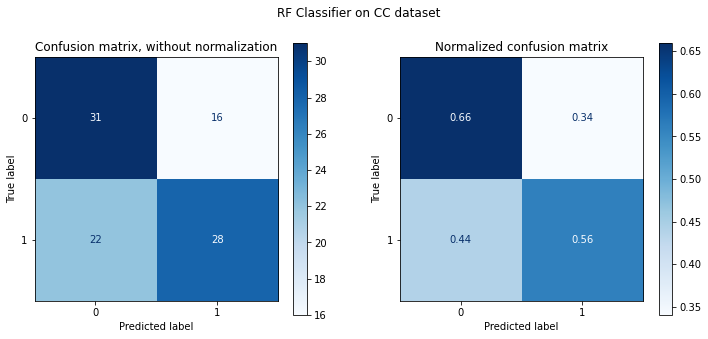

In [ ]:
#@title **CC - TF-IDF scale - Best RF model performance**
rf4_best = gs_rf4.best_estimator_
[RF4] = prt_model_performance(rf4_best, X_testf2, y_testf2, 'CC')
plt_cmx(rf4_best, X_testf2, y_testf2, 'RF Classifier on CC dataset')

### **Multilayer Perceptron Classifier (MLP)**

Artiicial Neural Network (ANN) is a machne learning model inspired by the networks of biological neurons of the human brain.<br>
There are several possible network architectures, the simplest is the feedforward ANN which consist of a sequence of fully connected layers each with its own number of neurons. In the learning phase, the network adjust its weights, that define the connection strenght among the neurons, to be able to correctly classify data.

**JI - Fine tuning of Multilayer Perceptron model**

In [ ]:
alpha_values = np.array([0.01]) #10.0 ** -np.arange(1, 7)
mlp = MLPClassifier('random_state = 123', tol = 1e-8, max_iter = 500, learning_rate_init = .001)
grid_param_mlp={'learning_rate': ['constant', 'adaptive'],
                'hidden_layer_sizes': [(100, 50, 30, 30)], # (90, 45, 27, 9)(100, 50, 30, 10)
                'alpha': alpha_values,
                'activation': ['identity', 'relu'],
                'solver': ['adam'],
                }

MLP_clf = GridSearchCV(mlp, param_grid = grid_param_mlp,  cv = 5, scoring = 'accuracy', return_train_score = True, verbose=0)
gs_MLP_ji = MLP_clf.fit(X_train, y_train)
MLP_results_ji = gs_MLP_ji.cv_results_
results_MLP_ji = pd.DataFrame({'rank': MLP_results_ji['rank_test_score'],
                                'params': MLP_results_ji['params'],
                                'cv train score (mean)': MLP_results_ji['mean_train_score'],
                                'cv test score (mean)': MLP_results_ji['mean_test_score'],
                                'cv score (std)': MLP_results_ji['std_test_score']}
                              )
results_MLP_ji = results_MLP_ji.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_MLP_ji.head()

,rank,params,cv train score (mean),cv test score (mean),cv score (std)
0,1,"{'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 30, 30), 'learning_rat...",0.67,0.64,0.05
1,2,"{'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 30, 30), 'learning_rat...",0.67,0.64,0.04
2,3,"{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 30, 30), 'learning_rate': ...",1.00,0.56,0.02
3,4,"{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 30, 30), 'learning_rate': ...",1.00,0.55,0.02


-----------------------------------------------------
Best model    > MLPClassifier(activation='identity', alpha=0.01,
              hidden_layer_sizes=(100, 50, 30, 30), max_iter=500, tol=1e-08)
Test Accuracy : 0.7168
Precision     : 0.7151
Recall        : 0.7147
F1 Score      : 0.7149
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.69      0.69        80
           1       0.73      0.74      0.74        93

    accuracy                           0.72       173
   macro avg       0.72      0.71      0.71       173
weighted avg       0.72      0.72      0.72       173



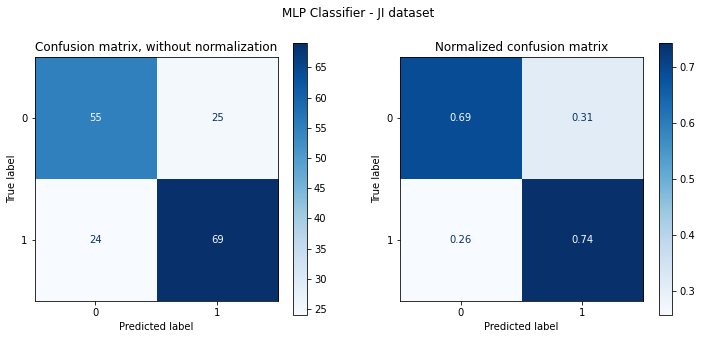

In [ ]:
#@title **JI - Best MLP model performance**
MLP_best = MLP_clf.best_estimator_
[MLP1] = prt_model_performance(MLP_best, X_test, y_test, 'JI')
plt_cmx(MLP_best, X_test, y_test, 'MLP Classifier - JI dataset')
update_summary(MLP1, clf_results)

**CC - Fine tuning of Multilayer Perceptron model**

In [ ]:
MLP_clf2 = GridSearchCV(mlp, param_grid = grid_param_mlp,  cv = 5, scoring = 'accuracy', return_train_score = True, verbose=0)
gs_MLP_cc = MLP_clf2.fit(X_train2, y_train2)
MLP_results_cc = gs_MLP_cc.cv_results_
results_MLP_cc = pd.DataFrame({'rank': MLP_results_cc['rank_test_score'],
                                'params': MLP_results_cc['params'],
                                'cv train score (mean)': MLP_results_cc['mean_train_score'],
                                'cv test score (mean)': MLP_results_cc['mean_test_score'],
                                'cv score (std)': MLP_results_cc['std_test_score']}
                              )
results_MLP_cc = results_MLP_cc.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_MLP_cc.head()

,rank,params,cv train score (mean),cv test score (mean),cv score (std)
0,1,"{'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 30, 30), 'learning_rat...",0.78,0.74,0.04
1,2,"{'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 30, 30), 'learning_rat...",0.78,0.74,0.04
2,3,"{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 30, 30), 'learning_rate': ...",1.00,0.71,0.05
3,4,"{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 30, 30), 'learning_rate': ...",1.00,0.67,0.04


-----------------------------------------------------
Best model    > MLPClassifier(activation='identity', alpha=0.01,
              hidden_layer_sizes=(100, 50, 30, 30), max_iter=500, tol=1e-08)
Test Accuracy : 0.7320
Precision     : 0.7354
Recall        : 0.7336
F1 Score      : 0.7317
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        47
           1       0.77      0.68      0.72        50

    accuracy                           0.73        97
   macro avg       0.74      0.73      0.73        97
weighted avg       0.74      0.73      0.73        97



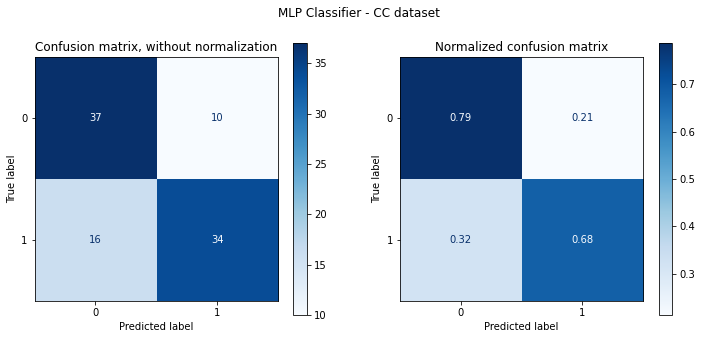

In [ ]:
#@title **CC - Best MLP model performance**
MLP_best2 = MLP_clf2.best_estimator_
[MLP2] = prt_model_performance(MLP_best2, X_test2, y_test2, 'CC')
plt_cmx(MLP_best2, X_test2, y_test2, 'MLP Classifier - CC dataset')
update_summary(MLP2, clf_results)

## **Multioutput regressors**

---



We build and evaluate some multioutput regressors based on the following machine learning algorithms:

* Mean scaler model (MS)
* Elastic-Net (EN).
* Support Vector Machines (SVM).
* Boosting - CatBoost (CB).
* Denoising Autoencoder (DAE).

We will evaluate their performance using the RMSE (Root Mean Square Err) and the Accuracy on the rounded outputs.

In [ ]:
#@title **Definition of some helper functions to evaluate regressors**
def prt_model_performance_reg(model, X_test, y_test, set_name):
    estimator_name = model.__class__.__name__
    y_test = y_test.to_numpy()
    model_predict = model.predict(X_test).clip(1, 5)
    rmse_per_item = mean_squared_error(y_test, model_predict, multioutput='raw_values', squared=False)
    n_correct_per_item = (model_predict.round() == y_test).sum(0)
    acc_per_item = (n_correct_per_item / model_predict.shape[0])*100
    best_test_score = (n_correct_per_item.sum() / (model_predict.shape[0] * model_predict.shape[1]))*100
    print(f'-----------------------------------------------------')
    print(f'Dataset       > {set_name}')
    print(f'Model         > {estimator_name}')
    print(f'Test Accuracy : {best_test_score:.2f}%')
    print(f'-----------------------------------------------------')
    summary_model = [(set_name, estimator_name, best_test_score)]
    return summary_model, rmse_per_item, acc_per_item

def get_results(X, Y, use_best, q_list=item_M + item_P + item_N):
    res_df = pd.DataFrame(columns=["q","model","param","rmse","acc_perc"])

    ms_res = get_ms_results(X, Y, q_list)
    en_res = get_en_results(X, Y, use_best, q_list)
    svm_res = get_svm_results(X, Y, use_best, q_list)
    cb_reg_res = get_cb_reg_results(X, Y, use_best, q_list)
    cb_cls_res = get_cb_cls_results(X, Y, use_best, q_list)
    
    for i in range(len(ms_res)):
        res_df.loc[len(res_df)] = [ms_res.iloc[i,0], "MS", ms_res.iloc[i,1], ms_res.iloc[i,2], ms_res.iloc[i,3]]
        res_df.loc[len(res_df)] = [en_res.iloc[i,0], "EN", en_res.iloc[i,1], en_res.iloc[i,2], en_res.iloc[i,3]]
        res_df.loc[len(res_df)] = [svm_res.iloc[i,0], "SVM", svm_res.iloc[i,1], svm_res.iloc[i,2], svm_res.iloc[i,3]]
        res_df.loc[len(res_df)] = [cb_reg_res.iloc[i,0], "CB reg", cb_reg_res.iloc[i,1], cb_reg_res.iloc[i,2], cb_reg_res.iloc[i,3]]
        res_df.loc[len(res_df)] = [cb_cls_res.iloc[i,0], "CB cls", cb_cls_res.iloc[i,1], None, cb_cls_res.iloc[i,2]]

    return res_df

def plot_results(df_res, dae_rmse, dae_acc):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,12))
    seq = np.arange(27) * 5

    rmse = df_res["rmse"]
    ax1.plot(rmse[seq].reset_index(drop=True), '--o', label='MS')
    ax1.plot(rmse[seq+1].reset_index(drop=True), '--d', label='EN')
    ax1.plot(rmse[seq+2].reset_index(drop=True), '--v', label='SVM')
    ax1.plot(rmse[seq+3].reset_index(drop=True), '--s', label='CB reg')
    ax1.plot(pd.Series(dae_rmse), '--*', label='DAE')
    ax1.set_title('RMSE values', fontsize=14)
    ax1.set_xlabel('Items', fontsize=12)
    ax1.set_xticks(np.arange(27))
    ax1.set_xticklabels(item_M + item_P + item_N)
    ax1.set_ylabel('RMSE', fontsize=12)
    ax1.legend()

    acc_perc = df_res["acc_perc"]
    ax2.plot(acc_perc[seq].reset_index(drop=True), '--o', label='MS')
    ax2.plot(acc_perc[seq+1].reset_index(drop=True), '--d', label='EN')
    ax2.plot(acc_perc[seq+2].reset_index(drop=True), '--v', label='SVM')
    ax2.plot(acc_perc[seq+3].reset_index(drop=True), '--s', label='CB reg')
    ax2.plot(pd.Series(dae_acc), '--*', label='DAE')
    ax2.plot(acc_perc[seq+4].reset_index(drop=True), '--x', label='CB cls')
    ax2.set_title('Accuracy % values', fontsize=14)
    ax2.set_xlabel('Items', fontsize=12)
    ax2.set_xticks(np.arange(27))
    ax2.set_xticklabels(item_M + item_P + item_N)
    ax2.set_ylabel('Acc %', fontsize=12)
    ax2.legend()

    return plt.show()

### **Mean Scaler (MS)**

The mean scaler model consist in scaling the answears score on the bases of the mean difference between honest and dishonest answears to the same question (faking amount).<br>

$$
\hat{y_i} = x_{i} + {faking~ amount}\\
whereas: ~ ~ {faking~ amount} = \frac{1}{N} \sum_{j=1}^{N} (y_{j} - x_{j})
$$

This model is based on the strong hypothesis that each subject fake as the average faker does, that means that each participant should fake in the same way. Obviously this is a quite strong assumption but the model could be successful only in the case that this hp approximately holds.<br>
This model has the role of baseline benchmark because It's the simplest imaginable model.

In [ ]:
#@title **MS regressor model**
class mean_scaler:
    """Define the Mean Scaler model"""
    def __init__(self, diff=0):
        self.diff = diff

    def __repr__(self):
        return f"diff: {self.diff}"

    def train(self, x, y):
        self.diff = (y - x).mean()

    def predict(self, x):
        return np.clip(x + self.diff, 1, 5)

    def get_param(self):
        return {"diff": self.diff}


def get_ms_results(X, Y, q_list=item_M + item_P + item_N):
    """
    Train one MS model for each question in the list and save the results.
    @param:
      X dataframe with dishonest answears
      Y dataframe with honest answears
      q_list list of questions to reconstruct
    @return: res_df dataframe with question - model parameter - root MSE - accuracy % after rounding
    """
    res_df = pd.DataFrame(columns=["q","param","rmse","acc_perc"])
    for col in q_list:
        # train/test split (drop responses with freq 1 to be able to stratify the split)
        x = X[col].to_numpy() # select the q col
        y = Y[col].to_numpy()
        _ , indices, freq = np.unique(y, return_index=True, return_counts=True)
        remove_id = indices[freq==1] # identify responses with freq 1
        x = np.delete(x, remove_id)
        y = np.delete(y, remove_id)
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 123, stratify = y)
        
        # train the model
        ms = mean_scaler()
        ms.train(x_train, y_train)
        
        #save the results
        ms_pred = ms.predict(x_test)
        res_df.loc[len(res_df)] = [col, ms.get_param(),
                                   mean_squared_error(y_test, ms_pred, squared=False),
                                   (y_test==np.around(ms_pred)).sum()/len(y_test)*100]
    
    return res_df

### **Elastic-Net (EN)**

The EN model is basically a linear model with LASSO (L1) and Ridge (L2) penalties.<br>
If the LASSO penalty is favoured than the model may be used as feacture selector.

In [ ]:
#@title **EN regressor model**

# JI tuned parameters founded
ji_alpha_ls = [0.05, 0.1, 0.3, 0.05, 0.1, 0.05, 0.05, 0.1, 0.05,
               0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.7,
               0.05, 0.05, 0.05, 0.05, 0.1, 0.05, 0.1, 0.05, 0.1]
ji_l1_ratio_ls = [0.5, 0.7, 0.1, 0.9, 0.5, 0.9, 0.5, 0.5, 0.7,
                  0.7, 0.5, 0.7, 0.9, 0.7, 0.5, 0.7, 0.9, 0.1,
                  0.9, 0.7, 0.9, 0.9, 0.7, 0.5, 0.3, 0.7, 0.9]

# CC tuned parameters founded
cc_alpha_ls = [0.05, 0.1, 0.7, 0.1, 0.1, 0.1, 0.3, 0.1, 0.5,
               0.1, 0.05, 0.05, 0.3, 0.1, 0.3, 0.1, 0.1, 0.5,
               0.1, 0.1, 0.1, 0.3, 0.1, 0.3, 0.1, 0.5, 0.1]
cc_l1_ratio_ls = [0.9, 0.9, 0.1, 0.7, 0.7, 0.9, 0.1, 0.9, 0.1,
                  0.9, 0.9, 0.7, 0.5, 0.9, 0.1, 0.9, 0.9, 0.1,
                  0.7, 0.7, 0.5, 0.1, 0.9, 0.1, 0.5, 0.1, 0.7]


def get_tuned_en(X_train, y_train):
    """
    Tune the EN hyperparameters.
    @param:
      X_train features train set
      y_train response train set
    @return:
      gs_en.best_estimator_ the tuned model
      results_f_df df with info on the training results
    """
    # define the param grid and perform GridSearchCV to tune the param
    param_grid = {"alpha":[0.05,0.1,0.3,0.5,0.7,0.9], "l1_ratio":[0.1,0.3,0.5,0.7,0.9]}
    en = ElasticNet(random_state=123)
    gs_en = GridSearchCV(en, param_grid, cv = 5, scoring = 'neg_root_mean_squared_error', return_train_score = True, verbose=0)
    gs_en = gs_en.fit(X_train, y_train)

    # save some training stats
    en_results_f = gs_en.cv_results_
    results_f_df = pd.DataFrame({'rank': en_results_f['rank_test_score'],
                                  'params': en_results_f['params'],
                                  'cv train score (mean)': en_results_f['mean_train_score'],
                                  'cv test score (mean)': en_results_f['mean_test_score'],
                                  'cv score (std)': en_results_f['std_test_score']}
                                )
    results_f_df = results_f_df.sort_values(by=['rank'], ascending=True)

    # return the tuned model and the training stats
    return gs_en.best_estimator_, results_f_df

def get_en_results(X, Y, use_best, q_list=item_M + item_P + item_N):
    """
    Train one EN model for each question in the list and save the results.
    @param:
      X dataframe with dishonest answears
      Y dataframe with honest answears
      q_list list of questions to reconstruct
      use_best string if "JI" or "CC" load the previously tuned parameters otherwise tune with get_tuned_en() function
    @return: res_df dataframe with question - model parameters - root MSE - accuracy % after rounding
    """
    res_df = pd.DataFrame(columns=["q","param","rmse","acc_perc"])
    for col in q_list:
        # train/test split (drop responses with freq 1 to be able to stratify the split)
        y = Y[col].to_numpy() # select the col
        _ , indices, freq = np.unique(y, return_index=True, return_counts=True)
        remove_id = indices[freq==1] # identify responses with freq 1
        y = np.delete(y, remove_id)
        X_train, X_test, y_train, y_test = train_test_split(X.drop(remove_id), y, train_size = 0.8, random_state = 123, stratify = y)

        # train the model, if use_best setted then load tuned parameters previously founded
        if use_best=="JI":
            i = X.columns.get_loc(col)
            en_best = ElasticNet(random_state=123, alpha=ji_alpha_ls[i], l1_ratio=ji_l1_ratio_ls[i]).fit(X_train, y_train)
        elif use_best=="CC":
            i = X.columns.get_loc(col)
            en_best = ElasticNet(random_state=123, alpha=cc_alpha_ls[i], l1_ratio=cc_l1_ratio_ls[i]).fit(X_train, y_train)
        else:
            en_best, _ = get_tuned_en(X_train, y_train)
        
        #save the results
        en_pred = np.clip(en_best.predict(X_test), 1, 5)
        res_df.loc[len(res_df)] = [col, en_best.get_params(),
                                   mean_squared_error(y_test, en_pred, squared=False),
                                   (y_test==np.around(en_pred)).sum()/len(y_test)*100]
    
    return res_df

### **Support Vector Machine (SVM)**

In this case the SVM model is used as regressor. The working procedure is similar to the previously encountered classifier.

In [ ]:
#@title **SVM regressor model**

# JI tuned parameters founded
ji_kernel_ls = ["linear", "rbf", "rbf", "rbf", "rbf", "rbf", "linear", "rbf", "linear",
                "linear", "rbf", "linear", "linear", "rbf", "linear", "linear", "linear",
                "rbf", "rbf", "rbf", "rbf", "rbf", "rbf", "rbf", "rbf", "rbf", "linear"]
ji_C_ls = [0.5, 1, 0.5, 1.5, 1, 1, 1, 0.5, 0.5,
           1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.5,
           1, 1, 1.5, 1, 0.5, 1, 0.5, 1, 0.5]
ji_epsilon_ls = [0.2, 0.3, 0.5, 0.2, 0.05, 0.05, 0.2, 0.3, 0.3,
                 0.2, 0.1, 0.2, 0.1, 0.2, 0.3, 0.2, 0.2, 0.5,
                 0.4, 0.3, 0.05, 0.05, 0.05, 0.3, 0.4, 0.05, 0.4]

# CC tuned parameters founded
cc_kernel_ls = ["rbf", "rbf", "rbf", "rbf", "rbf", "rbf", "rbf", "rbf", "rbf",
                "sigmoid", "linear", "linear", "rbf", "rbf", "rbf", "linear", "rbf", "rbf",
                "rbf", "rbf", "sigmoid", "rbf", "linear", "rbf", "rbf", "rbf", "rbf"]
cc_C_ls = [2, 1, 2, 1.5, 1.5, 1, 2, 2, 1,
           0.5, 2, 0.5, 0.5, 1, 0.5, 0.5, 2, 2,
           1, 1.5, 0.5, 1, 0.5, 1, 0.5, 0.5, 2]
cc_epsilon_ls = [0.05, 0.5, 0.3, 0.3, 0.5, 0.3, 0.2, 0.5, 0.4,
                 0.1, 0.5, 0.5, 0.5, 0.5, 0.4, 0.2, 0.5, 0.4,
                 0.3, 0.05, 0.3, 0.5, 0.5, 0.3, 0.3, 0.5, 0.1]


def get_tuned_svm(X_train, y_train):
    """
    Tune the SVM hyperparameters.
    @param:
      X_train features train set
      y_train response train set
    @return:
      gs_svm.best_estimator_ the tuned model
      results_f_df df with info on the training results
    """
    # define the param grid and perform GridSearchCV to tune the param
    param_grid = {"kernel":["linear", "poly", "rbf", "sigmoid"], "C":[0.5,1,1.5,2], "epsilon":[0.05,0.1,0.2,0.3,0.4,0.5]}
    svm = SVR()
    gs_svm = GridSearchCV(svm, param_grid, cv = 5, scoring = 'neg_root_mean_squared_error', return_train_score = True, verbose=0)
    gs_svm = gs_svm.fit(X_train, y_train)

    # save some training stats
    svm_results_f = gs_svm.cv_results_
    results_f_df = pd.DataFrame({'rank': svm_results_f['rank_test_score'],
                                  'params': svm_results_f['params'],
                                  'cv train score (mean)': svm_results_f['mean_train_score'],
                                  'cv test score (mean)': svm_results_f['mean_test_score'],
                                  'cv score (std)': svm_results_f['std_test_score']}
                                )
    results_f_df = results_f_df.sort_values(by=['rank'], ascending=True)
    
    # return the tuned model and the training stats
    return gs_svm.best_estimator_, results_f_df

def get_svm_results(X, Y, use_best, q_list=item_M + item_P + item_N):
    """
    Train one SVM model for each question in the list and save the results.
    @param:
      X dataframe with dishonest answears
      Y dataframe with honest answears
      q_list list of questions to reconstruct
      use_best string if "JI" or "CC" load the previously tuned parameters otherwise tune with get_tuned_en() function
    @return: res_df dataframe with question - model parameters - root MSE - accuracy % after rounding
    """
    res_df = pd.DataFrame(columns=["q","param","rmse","acc_perc"])
    for col in q_list:
        # train/test split (drop responses with freq 1 to be able to stratify the split)
        y = Y[col].to_numpy() # select the col
        _ , indices, freq = np.unique(y, return_index=True, return_counts=True)
        remove_id = indices[freq==1] # identify responses with freq 1
        y = np.delete(y, remove_id)
        X_train, X_test, y_train, y_test = train_test_split(X.drop(remove_id), y, train_size = 0.8, random_state = 123, stratify = y)
        
        # train the model, if use_best setted then load tuned parameters previously founded
        if use_best=="JI":
            i = X.columns.get_loc(col)
            svm_best = SVR(kernel=ji_kernel_ls[i], C=ji_C_ls[i], epsilon=ji_epsilon_ls[i]).fit(X_train, y_train)
        elif use_best=="CC":
            i = X.columns.get_loc(col)
            svm_best = SVR(kernel=cc_kernel_ls[i], C=cc_C_ls[i], epsilon=cc_epsilon_ls[i]).fit(X_train, y_train)
        else:
            svm_best, _ = get_tuned_svm(X_train, y_train)
        
        #save the results
        svm_pred = np.clip(svm_best.predict(X_test), 1, 5)
        res_df.loc[len(res_df)] = [col, svm_best.get_params(),
                                   mean_squared_error(y_test, svm_pred, squared=False),
                                   (y_test==np.around(svm_pred)).sum()/len(y_test)*100]
    
    return res_df

### **Boosting - CatBoost (CB)**

The CatBoost algorithm is an evolution of the gradient boosting. It combines basic tree models to get the final prediction.<br>
The model calculate also variables influence (feacture importance) on the results. In addition some plots are available with the help of the shap library.

In [ ]:
#@title **CB regressor model**

# JI tuned parameters founded
ji_l2_leaf_reg_reg_ls = [9, 15, 15, 3, 6, 12, 12, 15, 15,
                         15, 15, 15, 15, 9, 15, 15, 15, 6,
                         15, 3, 9, 12, 15, 12, 3, 15, 15]
ji_random_strength_reg_ls = [0.8, 0.8, 0.8, 0.8, 0.6, 0.6, 0.6, 0.6, 1,
                             0.8, 0.8, 0.6, 1, 1, 0.8, 1, 1, 1,
                             0.8, 1, 0.8, 0.6, 0.6, 1, 0.8, 1, 0.8]

# CC tuned parameters founded
cc_l2_leaf_reg_reg_ls = [12, 12, 12, 3, 6, 3, 9, 9, 15,
                         9, 15, 3, 15, 15, 15, 15, 12, 6,
                         12, 3, 15, 15, 12, 15, 9, 15, 6]
cc_random_strength_reg_ls = [0.6, 0.8, 0.6, 0.6, 0.6, 0.6, 1, 0.6, 0.8,
                             0.8, 0.6, 0.8, 0.6, 1, 0.8, 1, 0.6, 0.8,
                             1, 0.8, 1, 0.8, 1, 0.8, 1, 1, 0.8]


def get_tuned_cb_reg(X_train, y_train):
    """
    Tune the CB regressor hyperparameters.
    @param:
      X_train features train set
      y_train response train set
    @return:
      gs_cb.best_estimator_ the tuned model
      results_f_df df with info on the training results
    """
    # define the param grid and perform GridSearchCV to tune the param
    param_grid = {"l2_leaf_reg":[3,6,9,12,15], "random_strength":[0.6,0.8,1], "bagging_temperature":[1,3]}
    cb = CatBoostRegressor(
        logging_level='Silent',
        random_seed=123,
        iterations=250,
        early_stopping_rounds=30,
        learning_rate=0.1,
        depth=6,
        loss_function='RMSE'
    )
    gs_cb = GridSearchCV(cb, param_grid, cv = 5, scoring = 'neg_root_mean_squared_error', return_train_score = True, verbose=0)
    gs_cb = gs_cb.fit(X_train, y_train)

    # save some training stats
    cb_results_f = gs_cb.cv_results_
    results_f_df = pd.DataFrame({'rank': cb_results_f['rank_test_score'],
                                  'params': cb_results_f['params'],
                                  'cv train score (mean)': cb_results_f['mean_train_score'],
                                  'cv test score (mean)': cb_results_f['mean_test_score'],
                                  'cv score (std)': cb_results_f['std_test_score']}
                                )
    results_f_df = results_f_df.sort_values(by=['rank'], ascending=True)
    
    # return the tuned model and the training stats
    return gs_cb.best_estimator_, results_f_df

def get_cb_reg_results(X, Y, use_best, q_list=item_M + item_P + item_N):
    """
    Train one CB regressor model for each question in the list and save the results.
    @param:
      X dataframe with dishonest answears
      Y dataframe with honest answears
      q_list list of questions to reconstruct
      use_best string if "JI" or "CC" load the previously tuned parameters otherwise tune with get_tuned_en() function
    @return: res_df dataframe with question - model parameters - root MSE - accuracy % after rounding
    """
    res_df = pd.DataFrame(columns=["q","param","rmse","acc_perc"])
    for col in q_list:
        # train/test split (drop responses with freq 1 to be able to stratify the split)
        y = Y[col].to_numpy() # select the col
        _ , indices, freq = np.unique(y, return_index=True, return_counts=True)
        remove_id = indices[freq==1] # identify responses with freq 1
        y = np.delete(y, remove_id)
        X_train, X_test, y_train, y_test = train_test_split(X.drop(remove_id), y, train_size = 0.8, random_state = 123, stratify = y)
        
        # train the model, if use_best setted then load tuned parameters previously founded
        if use_best=="JI":
            i = X.columns.get_loc(col)
            cb_reg_best = CatBoostRegressor(
                              logging_level='Silent',
                              random_seed=123,
                              iterations=250,
                              early_stopping_rounds=30,
                              learning_rate=0.1,
                              depth=6,
                              loss_function='RMSE',
                              bagging_temperature=1,
                              l2_leaf_reg = ji_l2_leaf_reg_reg_ls[i],
                              random_strength = ji_random_strength_reg_ls[i]
                          ).fit(X_train, y_train)
        elif use_best=="CC":
            i = X.columns.get_loc(col)
            cb_reg_best = CatBoostRegressor(
                              logging_level='Silent',
                              random_seed=123,
                              iterations=250,
                              early_stopping_rounds=30,
                              learning_rate=0.1,
                              depth=6,
                              loss_function='RMSE',
                              bagging_temperature=1,
                              l2_leaf_reg = cc_l2_leaf_reg_reg_ls[i],
                              random_strength = cc_random_strength_reg_ls[i]
                          ).fit(X_train, y_train)
        else:
            cb_reg_best, _ = get_tuned_cb_reg(X_train, y_train)
        
        #save the results
        cb_reg_pred = np.clip(cb_reg_best.predict(X_test), 1, 5)
        res_df.loc[len(res_df)] = [col, cb_reg_best.get_params(),
                                   mean_squared_error(y_test, cb_reg_pred, squared=False),
                                   (y_test==np.around(cb_reg_pred)).sum()/len(y_test)*100]
    
    return res_df

def analyze_cb_reg(X, y, model_params, subject_ls=None):
    """
    Get some informative stats on the CB regressor model.
    @param:
      X dataframe with dishonest answears
      y np array with honest answears
      model_params dict with the model params to set
      subject_ls list with the subjects that needs to be deeply checked (the first is number 0),
                      if None or empty list display stats on the overall model
    """
    # train/test split (drop responses with freq 1 to be able to stratify the split)
    _ , indices, freq = np.unique(y, return_index=True, return_counts=True)
    remove_id = indices[freq==1]
    y = np.delete(y, remove_id)
    X_train, _, y_train, _ = train_test_split(X.drop(remove_id), y, train_size = 0.8, random_state = 123, stratify = y)

    # fit the model setting the passed param
    model = CatBoostRegressor(**model_params).fit(X_train, y_train)

    # calc the shap values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    
    # get stats
    if subject_ls is None or subject_ls==[]: # general model stats
        print("Questions importance for the model outcome (sum up to 100)")
        display(model.get_feature_importance(prettified=True)) # questions importance for the model outcome (sum up to 100)
        print("\nSubject (dot) view of the questions importance for the model outcome")
        display(shap.summary_plot(shap_values, X)) # subject (dot) view of the questions importance for the model outcome
    else: # subject level stats
        shap.initjs() # in colab needed in each force_plot cell
        for i in subject_ls:
            print(f"Questions effect for the subject {i} outcome")
            display(shap.force_plot(explainer.expected_value, shap_values[i,:], X.iloc[i,:])) # questions effect for the subject i outcome

This is the **classifier version of the CB model**.<br>
This model is designed treating the variables as ordinal categorical (so discrete) variables.<br>
Obviously dealing with categorical variables with multiple levels slow down the training process.

In [ ]:
#@title **CB classifier model**

# CLASSIFIER: treat the variables as ordinal categorical variables
# obviously dealing with categorical variables with multiple levels slow down the train process
# for the model use catboost internal library methods

# JI tuned parameters founded
ji_l2_leaf_reg_cls_ls = [6, 9, 3, 3, 9, 3, 15, 15, 6,
                         3, 15, 9, 6, 15, 3, 15, 3, 6,
                         3, 15, 9, 3, 9, 9, 12, 6, 9]
ji_random_strength_cls_ls = [0.8, 0.6, 0.6, 0.6, 0.8, 0.8, 0.8, 0.6, 0.6,
                             0.8, 1, 0.6, 0.8, 0.8, 0.8, 0.6, 1, 1,
                             0.8, 0.8, 0.6, 0.8, 0.6, 1, 0.6, 0.6, 0.8]
ji_bagging_temperature_cls_ls = [3, 3, 3, 1, 1, 3, 3, 1, 1,
                                 3, 3, 1, 3, 1, 1, 3, 1, 1,
                                 3, 3, 1, 3, 3, 1, 1, 3, 3]

# CC tuned parameters founded
cc_l2_leaf_reg_cls_ls = [12, 3, 3, 3, 3, 15, 3, 15, 3,
                         6, 3, 12, 3, 3, 3, 6, 3, 9,
                         3, 9, 3, 3, 15, 6, 3, 3, 3]
cc_random_strength_cls_ls = [0.6, 1, 0.6, 0.6, 0.6, 0.6, 0.6, 1, 1,
                             0.6, 0.6, 1, 0.6, 0.6, 0.8, 0.8, 0.6, 1,
                             0.8, 0.8, 0.8, 0.6, 0.8, 0.6, 1, 1, 1]
cc_bagging_temperature_cls_ls = [1, 3, 1, 3, 1, 1, 1, 1, 3,
                                 1, 1, 3, 1, 3, 3, 1, 1, 1,
                                 1, 3, 3, 3, 1, 3, 1, 3, 3]


def get_tuned_cb_cls(X_train, y_train):
    """
    Tune the CB classifier hyperparameters.
    @param:
      X_train features train set
      y_train response train set
    @return:
      cb_cl the tuned model
    """
    # define the param grid and perform GridSearchCV to tune the param
    param_grid = {"l2_leaf_reg":[3,6,9,12,15], "random_strength":[0.6,0.8,1], "bagging_temperature":[1,3]}
    cb_cl = CatBoostClassifier(
        logging_level='Silent',
        random_seed=123,
        iterations=250,
        early_stopping_rounds=30,
        learning_rate=0.1,
        depth=6,
        loss_function='MultiClass',
        auto_class_weights="Balanced"
    )
    gs_result = cb_cl.grid_search(param_grid, Pool(X_train, y_train, cat_features=item_M + item_P + item_N),
                                  cv=5, stratified=True, plot=False, verbose=50)

    # return the tuned model
    return cb_cl

def get_cb_cls_results(X, Y, use_best, q_list=item_M + item_P + item_N):
    """
    Train one CB classifier model for each question in the list and save the results.
    @param:
      X dataframe with dishonest answears
      Y dataframe with honest answears
      q_list list of questions to reconstruct
      use_best string if "JI" or "CC" load the previously tuned parameters otherwise tune with get_tuned_en() function
    @return: res_df dataframe with question - model parameters - accuracy %
    """
    res_df = pd.DataFrame(columns=["q","param", "acc_perc"])
    for col in q_list:
        # train/test split (drop responses with freq 1 to be able to stratify the split)
        y = Y[col].to_numpy() # select the col
        _ , indices, freq = np.unique(y, return_index=True, return_counts=True)
        remove_id = indices[freq==1] # identify responses with freq 1
        y = np.delete(y, remove_id)
        X_train, X_test, y_train, y_test = train_test_split(X.drop(remove_id), y, train_size = 0.8, random_state = 123, stratify = y)
        
        # train the model, if use_best setted then load tuned parameters previously founded
        if use_best=="JI":
            i = X.columns.get_loc(col)
            cb_cl_best = CatBoostClassifier(
                            logging_level='Silent',
                            random_seed=123,
                            iterations=250,
                            early_stopping_rounds=30,
                            learning_rate=0.1,
                            depth=6,
                            loss_function='MultiClass',
                            auto_class_weights="Balanced",
                            bagging_temperature = ji_bagging_temperature_cls_ls[i],
                            l2_leaf_reg = ji_l2_leaf_reg_cls_ls[i],
                            random_strength = ji_random_strength_cls_ls[i]
                        ).fit(X_train, y_train, cat_features=item_M + item_P + item_N)
        elif use_best=="CC":
            i = X.columns.get_loc(col)
            cb_cl_best = CatBoostClassifier(
                            logging_level='Silent',
                            random_seed=123,
                            iterations=250,
                            early_stopping_rounds=30,
                            learning_rate=0.1,
                            depth=6,
                            loss_function='MultiClass',
                            auto_class_weights="Balanced",
                            bagging_temperature = cc_bagging_temperature_cls_ls[i],
                            l2_leaf_reg = cc_l2_leaf_reg_cls_ls[i],
                            random_strength = cc_random_strength_cls_ls[i]
                        ).fit(X_train, y_train, cat_features=item_M + item_P + item_N)
        else:
            cb_cl_best = get_tuned_cb_cls(X_train, y_train)
        
        #save the results
        res_df.loc[len(res_df)] = [col, cb_cl_best.get_params(), cb_cl_best.score(X_test, y_test)*100]
    
    return res_df

def analyze_cb_cls(X, y, model_params, subject_ls=None):
    """
    Get some informative stats on the CB classifier model.
    @param:
      X dataframe with dishonest answears
      y np array with honest answears
      model_params dict with the model params to set
      subject_ls list with the subjects that needs to be deeply checked (the first is number 0),
                      if None or empty list display stats on the overall model
    """
    # train/test split (drop responses with freq 1 to be able to stratify the split)
    _ , indices, freq = np.unique(y, return_index=True, return_counts=True)
    remove_id = indices[freq==1]
    y = np.delete(y, remove_id)
    X_train, _, y_train, _ = train_test_split(X.drop(remove_id), y, train_size = 0.8, random_state = 123, stratify = y)

    # fit the model setting the passed param
    model = CatBoostClassifier(**model_params).fit(X_train, y_train, cat_features=item_M + item_P + item_N)

    # calc the shap values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(Pool(X, cat_features=item_M + item_P + item_N))

    # get stats
    if subject_ls is None or subject_ls==[]: # general model stats
        print("Questions importance for the model outcome (sum up to 100)")
        display(model.get_feature_importance(prettified=True)) # questions importance for the model outcome (sum up to 100)
        print("\nQuestions importance for each level of the model outcome")
        display(shap.summary_plot(shap_values, X)) # questions importance for each level of the model outcome
    else: # subject level stats
        shap.initjs() # in colab needed in each force_plot cell
        for i in subject_ls:
            print(f"Subject {i} classification probability for each level (1,2,3,4,5): {model.predict_proba(X.iloc[i,:])}") # subject i classification probability for each level (1,2,3,4,5)
            print(f"Questions effect for the subject {i} for each level probability (the model pick the highest value)") # questions effect for the subject i for each level probability (the model pick the highest value)
            for j in range(len(explainer.expected_value)):
                display(shap.force_plot(explainer.expected_value[j], shap_values[j][i,:], X.iloc[i,:]))

### **Denoising Autoencoder (DAE)**

Autoencoders are feed-fordward neural networks that attempt to recreate the input as their target using backpropagation.<br>
We utilize this model in order to reconstruct honest responses from the dishonest responses of the same questionnaire.

In [ ]:
#@title **DAE regressor model**

class Encoder(K.layers.Layer):
  def __init__(self, hidden_dim):
    super(Encoder, self).__init__()
    self.hidden_layer = K.layers.Dense(units = hidden_dim, activation = tf.nn.relu)
  def call(self, input_features):
    activation = self.hidden_layer(input_features)
    return activation

class Decoder(K.layers.Layer):
  def __init__(self, hidden_dim, original_dim):
      super(Decoder, self).__init__()
      self.output_layer = K.layers.Dense(units = original_dim, activation = tf.nn.relu)
  def call(self, encoded):
    activation = self.output_layer(encoded)
    return activation

class Autoencoder(K.Model):
  def __init__(self, hidden_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(hidden_dim = hidden_dim)
    self.decoder = Decoder(hidden_dim = hidden_dim, original_dim = original_dim)
  def call(self, input_features):
    encoded = self.encoder(input_features)
    reconstructed = self.decoder(encoded)
    return reconstructed

In [ ]:
np.random.seed(123)
tf.random.set_seed(123)
batch_size = 16
max_epochs = 600
eta = 1e-3
momentum = 8e-1
hidden_dim = 15
original_dim = 27

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)
es = EarlyStopping(monitor='val_loss',
                   mode = 'min',
                   patience = 30,
                   verbose = 1)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
gs_dae1 = Autoencoder(hidden_dim = hidden_dim, original_dim = original_dim)
gs_dae1.compile(loss = 'mse', optimizer = optimizer)
history_dae1 = gs_dae1.fit(X_trainr, y_trainr, verbose = 0,
                           validation_split = 0.2, # Calculate validation results on 20% of the training data.
                           validation_data = 'NULL',
                           epochs = max_epochs,
                           batch_size = batch_size,
                           callbacks=[es])

Epoch 00297: early stopping


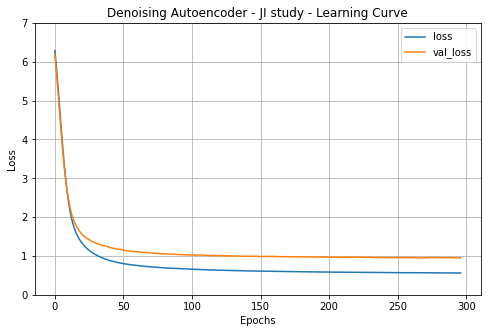

In [ ]:
#@title **JI - DAE Learning Curve**
pd.DataFrame(history_dae1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,7)
plt.title('Denoising Autoencoder - JI study - Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
#@title **JI - DAE Model Performance**
[summary_dae1, rmse_per_col1, acc_per_col1] = prt_model_performance_reg(gs_dae1, X_testr, y_testr, 'JI')
np.set_printoptions(precision=2)
print(f'% Test Accuracy per Item: {acc_per_col1}')

-----------------------------------------------------
Dataset       > JI
Model         > Autoencoder
Test Accuracy : 44.36%
-----------------------------------------------------
% Test Accuracy per Item: [57.47 41.38 35.63 35.63 34.48 50.57 60.92 40.23 32.18 43.68 44.83 54.02
 64.37 37.93 52.87 55.17 44.83 36.78 40.23 40.23 49.43 39.08 35.63 49.43
 36.78 36.78 47.13]


In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
gs_dae2 = Autoencoder(hidden_dim = hidden_dim, original_dim = original_dim)
gs_dae2.compile(loss = 'mse', optimizer = optimizer)
history_dae2 = gs_dae2.fit(X_trainr2, y_trainr2, verbose = 0,
                           validation_split = 0.2, # Calculate validation results on 20% of the training data.
                           validation_data = 'NULL',
                           epochs = max_epochs,
                           batch_size = batch_size,
                           callbacks=[es])

Epoch 00220: early stopping


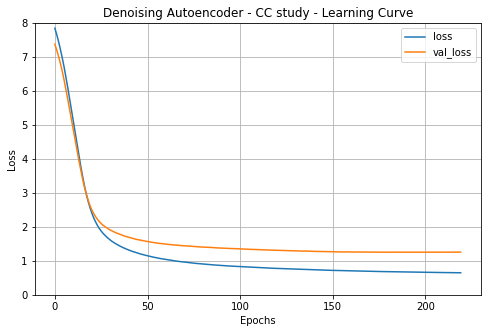

In [ ]:
#@title **CC - DAE Learning Curve**
pd.DataFrame(history_dae2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,8)
plt.title('Denoising Autoencoder - CC study - Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
#@title **CC DAE Model Performance**
[summary_dae2, rmse_per_col2, acc_per_col2] = prt_model_performance_reg(gs_dae2, X_testr2, y_testr2, 'CC')
np.set_printoptions(precision=2)
print(f'Test Accuracy per Item : {acc_per_col2}')

-----------------------------------------------------
Dataset       > CC
Model         > Autoencoder
Test Accuracy : 36.21%
-----------------------------------------------------
Test Accuracy per Item : [34.69 48.98 42.86 32.65 18.37 38.78 40.82 38.78 40.82 26.53 32.65 38.78
 57.14 26.53 40.82 46.94 36.73 40.82 20.41 40.82 40.82 48.98 32.65 26.53
 44.9  20.41 18.37]


# **5. Results**

### **Classifiers**

The following **table summarize** the classifiers performance. Classifiers applied on datasets with TF-IDF scale showed low performance (accuracy closed to 60%) and will not be considered in this summary.<br>
In the **JI study** all the proposed classifiers, except the knn that achive lower results, get an accuracy score that range around **70-75%**.<br>
The performance in the **CC study** slightly improve for all the models but still ranges around 70-75% except the RF classifier that spikes out outperforming the competitors by reaching an accuracy score of **80%**.

In [ ]:
#@title **Performance summary**
table_results = pd.pivot_table(clf_results, index = ['Study','Model'],
                               values = ['Test Accuracy'])
clf_table_results = table_results.reset_index().sort_values(['Study','Test Accuracy'], ascending=[1,0]).set_index(['Study','Model'])
clf_table_results

Test Accuracy
Study Model                                
CC    RandomForestClassifier           0.81
      SVC                              0.75
      LogisticRegression               0.73
      MLPClassifier                    0.73
      KNeighborsClassifier             0.72
JI    LogisticRegression               0.73
      MLPClassifier                    0.72
      SVC                              0.72
      KNeighborsClassifier             0.65

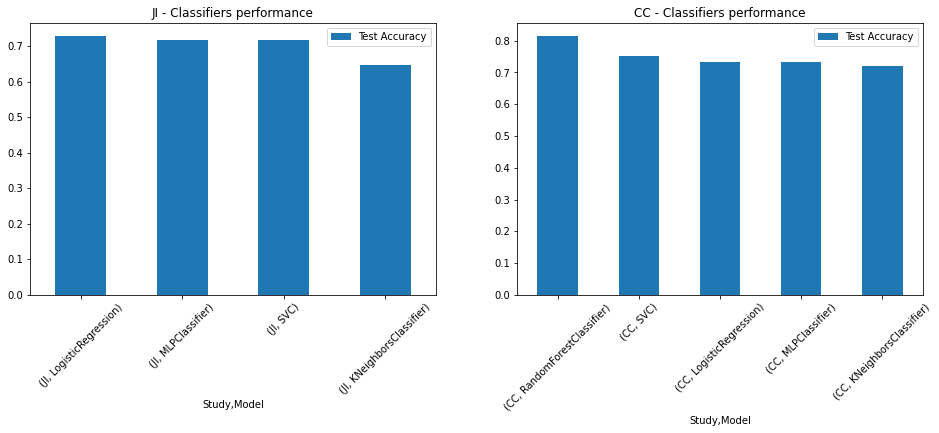

In [ ]:
#@title **Plot accuracy on datasets**
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
clf_table_results.iloc[clf_table_results.index.get_level_values('Study') == "JI"].plot(kind='bar', title='JI - Classifiers performance', rot=45, ax=ax1)
clf_table_results.iloc[clf_table_results.index.get_level_values('Study') == "CC"].plot(kind='bar', title='CC - Classifiers performance', rot=45, ax=ax2)
plt.show()

The RF classifier is also a quite interpretable model because it's possible to get the **predictors importance** on the bases of how much they influence the RF evaluations.<br>
The follwing charts show the results of this analysis first on the JI study and then on the CC.<br>
For the **JI group**, trusting the RF classifier, we have that questions **M3** and **N1** are the key predictors, **P7**, **N6** and **N8** are also relevant while the others are relegated to a minor role with many of them approximately useless.<br>
The same analysis carried out on the **CC group** reports that **P1** and **P5** are the two most important predictors followed by **P3** and **N7** that are also highly influential and **P8**, **N2** and **N9** that are still quite relevant, all the others are slightly significant with some of them approximately irrelevant.

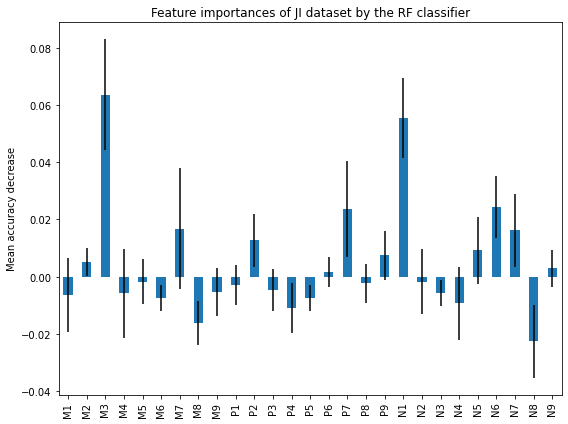

In [ ]:
#@title **JI - features importance (by RF model)**
ji_rf_result = permutation_importance(rf_best, X_test, y_test, n_repeats=10, random_state=123)
ji_forest_importances = pd.Series(ji_rf_result.importances_mean, index=item_M + item_P + item_N)

fig, ax = plt.subplots(figsize=(8,6))
ji_forest_importances.plot.bar(yerr=ji_rf_result.importances_std, ax=ax)
ax.set_title("Feature importances of JI dataset by the RF classifier")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

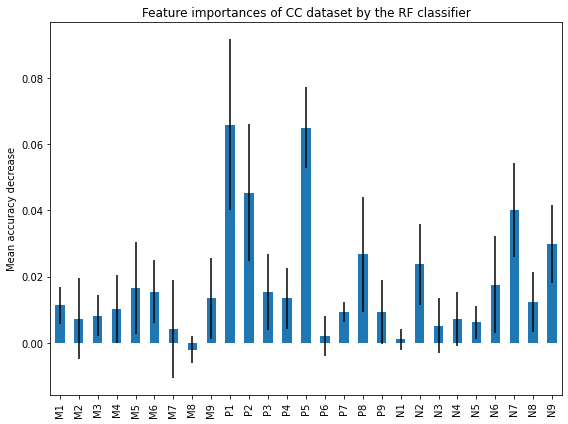

In [ ]:
#@title **CC - features importance (by RF model)**
cc_rf_result = permutation_importance(rf_best2, X_test2, y_test2, n_repeats=10, random_state=123)
cc_forest_importances = pd.Series(cc_rf_result.importances_mean, index=item_M + item_P + item_N)

fig, ax = plt.subplots(figsize=(8,6))
cc_forest_importances.plot.bar(yerr=cc_rf_result.importances_std, ax=ax)
ax.set_title("Feature importances of CC dataset by the RF classifier")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### **Multioutput Regressors**

The upcoming charts collect the multioutput models results.<br>
We have compared both the RMSE (Root Mean Square Error) and the Accuracy after rounding the predictions. The classifier version of the CB have been omitted from the RMSE comparison because that evaluation parameter makes no sense for a classifier.<br>
From the **RMSE** comparison in both cases, particularly in the CC study, the **clear losers** turns out to be the **MS** and the **DAE** models with all the others having almost equivalent results.<br>
When comparing the **accuracy** instead things became a lot more **unclear**, the **denoiser autoencoder** turns out to be a bit **poor** also for this parameter but there is no clear winner with no single model that outperform all the others in all the questions.<br>
Focusing on the comparison with the MS model, in the JI group it's well beaten, at least by one model, only in the questions M3, M7, N1, N4, while for the CC group those questions are many more, M1-2-3-4-5-7-9, P1-2-6-8-9 and N2.

Get the Honest and Dishonest subsets.

In [ ]:
X_ji_r = data.iloc[int(data.shape[0]/2):, :27].reset_index(drop=True) # D 432x27
Y_ji_r = data.iloc[:int(data.shape[0]/2), :27]

X_cc_r = data2.iloc[int(data2.shape[0]/2):, :27].reset_index(drop=True) # D 241x27
Y_cc_r = data2.iloc[:int(data2.shape[0]/2), :27]

Collect JI results (DAE already saved)

In [ ]:
# JI - regressors results
df_ji_scores = get_results(X_ji_r, Y_ji_r, use_best="JI") #, q_list=["M1","P1","N1"]

# tabular display of the results
#pd.options.display.float_format = '{:.2f}'.format
#df_ji_plt = pd.pivot_table(df_ji_scores, index = ["q","model"], values = ["rmse", "acc_perc"]).T
#display(df_ji_plt.iloc[:,0:9*5])
#print("#-----------------------------------------------#")
#display(df_ji_plt.iloc[:,9*5:9*5*2])
#print("#-----------------------------------------------#")
#display(df_ji_plt.iloc[:,9*5*2:])

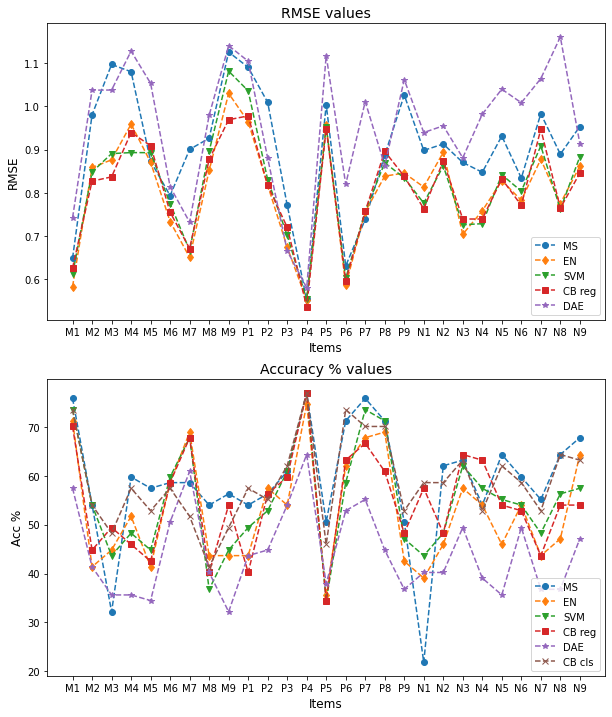

In [ ]:
#@title **JI - Plot regressors results**
plot_results(df_ji_scores, rmse_per_col1, acc_per_col1)

Collect CC results (DAE already saved).

In [ ]:
# CC - regressors results
df_cc_scores = get_results(X_cc_r, Y_cc_r, use_best="CC") #, q_list=["M1","P1","N1"]

# tabular display of the results
#df_cc_plt = pd.pivot_table(df_cc_scores, index = ["q","model"], values = ["rmse", "acc_perc"]).T
#display(df_cc_plt.iloc[:,0:9*5])
#print("#-----------------------------------------------#")
#display(df_cc_plt.iloc[:,9*5:9*5*2])
#print("#-----------------------------------------------#")
#display(df_cc_plt.iloc[:,9*5*2:])

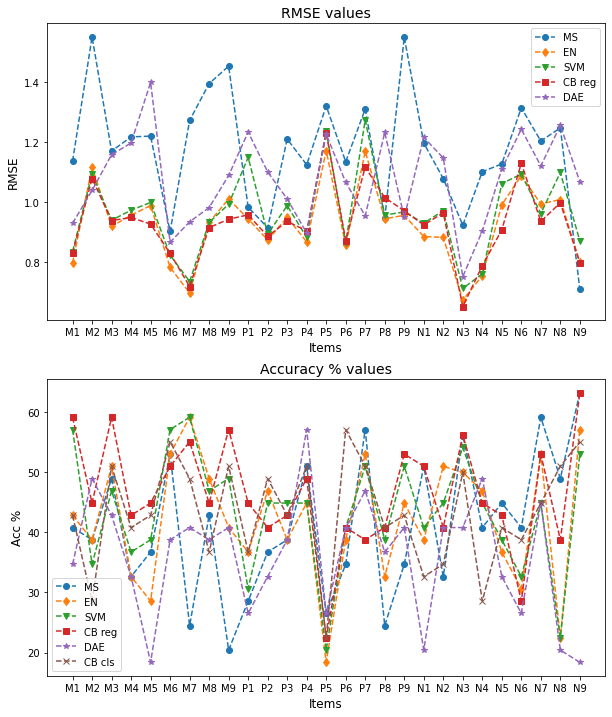

In [ ]:
#@title **CC - Plot regressors results**
plot_results(df_cc_scores, rmse_per_col2, acc_per_col2)

As the case of the RF classifier, for the CB models it's possible to obtain their own evaluated feactures importances. In addition it's also possible to get how the model obtain the result for some specific subjects of interest.<br>
Here is reported an example of such a possible analisys.

Questions importance for the model outcome (sum up to 100)


,Feature Id,Importances
0,M7,19.65
1,M1,11.19
2,M9,10.61
3,M4,6.97
4,P7,5.87
5,N3,5.46
6,N8,5.28
7,N7,4.93
8,M3,4.42
9,N4,4.42



Questions importance for each level of the model outcome


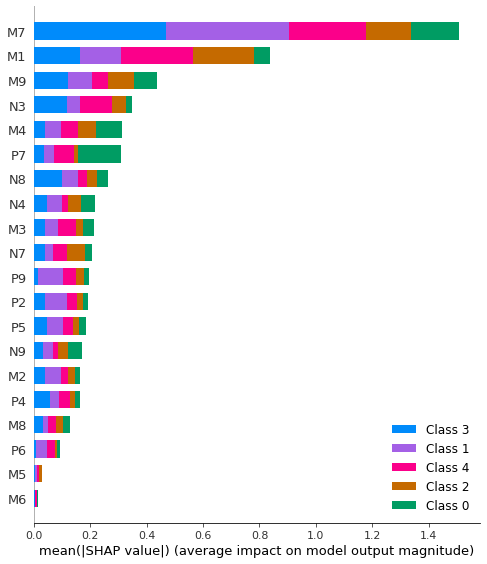

None

In [ ]:
#@title **Features importance (by CB model) example**
# CB cls: focus on question M7 of JI
analyze_cb_cls(X_ji_r, Y_ji_r['M7'].to_numpy(), df_ji_scores.iloc[34]["param"])

In [ ]:
#@title **Single subject evaluation (by CB model) example**
# CB cls: focus on question P1 of JI, subjects n 0 and 10
analyze_cb_cls(X_ji_r, Y_ji_r['P1'].to_numpy(), df_ji_scores.iloc[49]["param"], subject_ls=[0,10])

Subject 0 classification probability for each level (1,2,3,4,5): [0.47 0.43 0.04 0.05 0.01]
Questions effect for the subject 0 for each level probability (the model pick the highest value)


Subject 10 classification probability for each level (1,2,3,4,5): [0.66 0.22 0.04 0.06 0.02]
Questions effect for the subject 10 for each level probability (the model pick the highest value)


**Summarizing the models results:**<br>
In the **JI study:**
* Except the **knn** that is **poorer**, all the **classifiers** are almost equivalent getting an **accuracy** score between **70-75%**.
* On the bases of the RF the most **relevant questions** to classify are: first of all **M3, N1** and then also **P7, N6, N8**.
* From a **RMSE** point of view the **clear losers** are the **MS** and the **DAE regressors** with all the **others almost equivalent**.
* Switching instead to the **accuracy** of the rounded predictions, the **DAE** is **a bit poor** but there is **no clear winner**. The MS for this parameter seems to do a good job having trouble only in the questions M3, M7, N1, N4.
* The feacture importances based on the CB highlights that the most **important predictor** in all but P9 is the **corresponding faked question**. Each time also other different predictors are relevant.

In the **CC study:**
* All the **classifiers** performances are **a bit better** but still around 70-75% except the **RF** that is able to reach a value of **80%** outperforming the others.
* Trusting the RF classifier the most **significant questions** are: **P1, P5** followed by **P3, N7** and finally **P8, N2, N9**.
* From a **RMSE** point of view the **clear losers** are the **MS** and the **DAE regressors** with all the **others almost equivalent**.
* Switching instead to the **accuracy** of the rounded predictions the results are quite messy, the **clear loser is the DAE** model but **no real winner** can be identified. This time the MS has trouble in many more questions: M1-2-3-4-5-7-9, P1-2-6-8-9 and N2.
* The **feacture importance** values still identify **many times the corresponding faked question** as the most important predictor but in general **with lower values** than in the JI study, moreover many times this correspondence doesn't hold anymore.

In both studies **rescaling with the TF-IDF** method leads to **worse results**.

# **6. Conclusions**

From **EDA** results we have observed that **participants haven't faked that much** and, in particular in the JI study, when faking many times they have unexpectedly taken the increasing direction.
In our opinion this can be explained by the following scenarios:

* Test/Retest reliability: a subject that take the test two times in the same conditions won't give exactly the same answears. This means that the collected replies have a native slight variability.
* Native bias: the test is self-describing so, even if the test was anonymous and voluntary taken, there might be a social desirability factor that pushed the subjects to give a better self-image lying a bit also in the honest case.
* Honest already good: in some questions the honest answear might be already a good choice and so there is no need to fake them.<br>
Ex. In P4 (People often say I’m out of control) the honest score might likely be already low or in M4 (Avoid direct conflict with others because they may be useful in the future) giving an high score might not be so bad.

**The effect of this soft faking is that the honest and dishonest answears score distributions are widely overlapping and this affect the models results**.

The first goal of this work was to develope **classifiers** that are able to spot the fakers.<br>
We have implemented both interpretable models like LR and RF as more black-box models such as SVM and NN.<br>
As anticipated, the key factor to understand the classifiers results lies in the honest and dishonest distribution overlapping, in fact:
* **Without a big difference between honest and fakers** in any of the responses it becames **difficult to spot liars**. This is the reason why we didn't get amazing accuracy scores but this is also the reason why we belive that the achived percentages are pretty decent.
* The overlapping in the CC study is a bit less strong and this explain why the results in the **CC study** are **a bit better** even if the number of participants that are available to train the models is almost half.
* Comparing the **distributions of the influent questions** selected by the RF with all the others, it may be noticed that almost all of them are **somehow disjoint** with respect to the others.<br>
  This is quite reasonable because to be able to detect fakers it's natural to choose questions where the honest and dishonest behaviour is different.

The second goal was to design **regressors** that are capable of reconstructing the real answears from the faked ones.<br>
In this case we have developed four classical machine learning regressors and for the CB also the classifier version, in addition we have also developed a denoiser autoencoder. The **MS** has the role of **baseline score** as it's the simplest model but relies on the strong and unlikely hp that all the partecipant fake almost in the same way.<br>
Analyzing the multioutput models results our conclusions are that:
* Compared with the others, in many questions the baseline **MS** model has an **high RMSE** but a decent or even **good accuracy**.<br>
  This imply that the MS model, for many questions, gets the exact **right prediction approximately as many times as the others but when going wrong it's badly wrong**.
* The **MS RMSE results can be drawn from the standard error calculated on the difference (faking amount) distribution** Diff = H - D.<br>
  $$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i-\hat y_i)^2 \stackrel{MS}= \frac{1}{n} \sum_{i=1}^{n} (y_i-x_i-\bar d)^2 \stackrel{def}= \frac{1}{n} \sum_{i=1}^{n} (d_i-\bar d)^2 = \sigma_{Diff}^2
$$
  The way we evaluated those values are such that they don't exactly match each other, this is because the standard errors are computed on the whole dataset while the RMSE only on the test subset.<br>
  Anyway high standard error values are still in general indication of high RMSE for the MS.<br>
  This result is pretty reasonable, in fact, high std err value means high variability in the faking behaviour that in turn leads to many errors from the MS due to the totally incorrectness of its hp.
* **The conditions that possibly leads to low accuracy of the MS are a moderately high faking presence and variability** that means many fakers with different deceptive strategies.<br>
  In both groups, particularly the JI, for many questions these conditions are not satisfyed, that's why the accuracy scores of the MS are decent or even good.
* The **distriution overlapping** factor has an influence also on the multioutput models. The fact that there is this soft faking trend is reflected on the **correlation matricies** between honest and dishonest having most of the times the most (and quite high) **significant value between corresponding questions**.<br>
  This correspondence explain why we have that, especialy in the JI study where this tendency is stronger, **the analog question is the most powerful predictor**.<br>
  Our intuition suggest that for this purpose having the presence of a correlated predictor should help the models.

The idea behind **TF-IDF** method is to detect suspect responses values.<br>
The **failure** of this method is once again attributable to the general **soft faking**, in fact, without much difference between the honest and dishonest responses it's almost impossible to define suspect behaviours which are proper only of the vast majority of the fakers.<br>

**Overall we can state that**:
* There is **no much faking** presence, this behaviour has a **huge impact** on the results and should be checked collecting other replies if possible.
* It cause the **faillure of the TF-IDF** method.
* It affects the **classifiers** results but they still achive decent **accuracy (75 and 80%)**.
* **It probably boosts all the multioutput models results but for sure highly enhance the naive MS performaces. Anyway, even in these conditions the other models should be prefered**.

---

**Other possible ideas that may worth investigate**:
* If in reality the distributions turns out to be lot more disjoint, TF-IDF method (or variants that assign higher scores to higher responses (faking good)) should work spotting fakers even item-wise.<br>
  In that case, besides having a excelent classifier, it would be possible to add those item-wise spotting results as extra input of the multioutput models.
* It may be possible that combining the models a new better model is achieved.
* Performing feactures selection may remove noisy predictors improving the models.

# **7. References**

> Daniel N. Jones and Delroy L. Paulhus (2013). Introducing the Short Dark Triad (SD3): A Brief Measure of Dark Personality Traits. *DOI: 10.1177/1073191113514105*
>

> Merylin Monaro · Cristina Mazza · Marco Colasanti · Stefano Ferracuti · Graziella Orrù · Alberto di Domenico ·
Giuseppe Sartori · Paolo Roma (2021). Detecting faking‑good response style in personality questionnaires
with four choice alternatives. *Psychological Research (2021) 85:3094–3107*
https://doi.org/10.1007/s00426-020-01473-3
>

> Alberto Purpura, Dora Giorgianni, Graziella Orrù, Giulia Melis, Giuseppe Sartori (2021). Identifying Faking to Single Item Responses in Personality Tests: a New TF-IDF Based Method.
>

> Aurélien Géron. Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow 2nd Edition. *(2019) O'Reilly Media Inc.*
>